In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.preprocessing import StandardScaler

In [3]:
dataset = pd.read_csv('/content/IndFD-PM-DT dataset.csv')

In [4]:
dataset.head()

Datetime  Vibration_Level  Temperature_Readings  Pressure_Data  \
0  2021-06-21 08:00:00         0.336129             23.865396      15.346143   
1  2019-03-07 10:00:00         0.441680             27.332215      19.648924   
2  2023-01-13 08:00:00         0.349080             29.483668      10.466149   
3  2021-08-13 23:00:00         0.507108             19.005118      32.012730   
4  2022-09-21 07:00:00         1.402247             32.096101      22.620923   

   Acoustic_Signals  Humidity_Levels  Motor_Speed  Torque_Data  \
0         42.709897        31.404880    59.812632     3.677243   
1         56.146535        23.516423    65.572156     1.057276   
2         80.487979        27.537668    53.951904     0.881063   
3         63.602072        14.888160    36.715289     1.372567   
4         47.574150        22.703902    52.411045     0.437824   

   Energy_Consumption  Production_Rate  ...  Controller_Setpoints  \
0            1.994422        71.472236  ...             55.040202   
1            7.086933        79.280461  ...             56.245287   
2            8.155945       100.994780  ...             47.621152   
3            0.974947       108.291454  ...             48.786144   
4            1.401210        95.616224  ...             54.382062   

   Actual_vs_Setpoint_Values  Alarm_Trigger_Data  Repair_Logs  \
0                  53.633334                 0.0          0.0   
1                  56.292362                 0.0          0.0   
2                  44.103209                 0.0          0.0   
3                  51.057235                 0.0          0.0   
4                  55.865060                 0.0          0.0   

   Spare_Part_Usage  Anomaly_Scores  Fault_Probability  Operator_Shift_Data  \
0          4.326138       31.806763          26.218982                  2.0   
1          3.006478       16.828544          10.021797                  2.0   
2          0.468073       30.532711          45.273987                  3.0   
3          3.270788        2.718529          28.625665                  3.0   
4          4.598529       35.209996          18.994673                  3.0   

   Quality_Control_Test_Results  Fault_Diagnosis  
0                     89.347791              1.0  
1                     89.013490              0.0  
2                     86.990711              0.0  
3                     79.234826              0.0  
4                     86.246880              0.0  

[5 rows x 38 columns]

In [5]:
dataset.columns

Index(['Datetime', 'Vibration_Level', 'Temperature_Readings', 'Pressure_Data',
       'Acoustic_Signals', 'Humidity_Levels', 'Motor_Speed', 'Torque_Data',
       'Energy_Consumption', 'Production_Rate', 'Tool_Wear_Rate',
       'Machine_Utilization_Rate', 'Cycle_Time_Per_Operation', 'Idle_Time',
       'Machine_Load_Percentage', 'Ambient_Temperature', 'Humidity',
       'Air_Quality_Index', 'Machine_Health_Index', 'Failure_Mode_Indicators',
       'Maintenance_Logs', 'Previous_Fault_Occurrences',
       'Predictive_Maintenance_Scores', 'Component_Degradation_Index',
       'Real_Time_Performance_Index', 'Machine_Start_Stop_Events',
       'Downtime_Incidents', 'Fault_Trigger_Timestamps',
       'Controller_Setpoints', 'Actual_vs_Setpoint_Values',
       'Alarm_Trigger_Data', 'Repair_Logs', 'Spare_Part_Usage',
       'Anomaly_Scores', 'Fault_Probability', 'Operator_Shift_Data',
       'Quality_Control_Test_Results', 'Fault_Diagnosis'],
      dtype='object')

In [6]:
dataset.shape

(17610, 38)

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17610 entries, 0 to 17609
Data columns (total 38 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Datetime                       17610 non-null  object 
 1   Vibration_Level                17610 non-null  float64
 2   Temperature_Readings           17610 non-null  float64
 3   Pressure_Data                  17610 non-null  float64
 4   Acoustic_Signals               17610 non-null  float64
 5   Humidity_Levels                17610 non-null  float64
 6   Motor_Speed                    17610 non-null  float64
 7   Torque_Data                    17610 non-null  float64
 8   Energy_Consumption             17610 non-null  float64
 9   Production_Rate                17609 non-null  float64
 10  Tool_Wear_Rate                 17609 non-null  float64
 11  Machine_Utilization_Rate       17609 non-null  float64
 12  Cycle_Time_Per_Operation       17609 non-null 

In [8]:
dataset.value_counts()

Datetime             Vibration_Level  Temperature_Readings  Pressure_Data  Acoustic_Signals  Humidity_Levels  Motor_Speed  Torque_Data  Energy_Consumption  Production_Rate  Tool_Wear_Rate  Machine_Utilization_Rate  Cycle_Time_Per_Operation  Idle_Time  Machine_Load_Percentage  Ambient_Temperature  Humidity   Air_Quality_Index  Machine_Health_Index  Failure_Mode_Indicators  Maintenance_Logs  Previous_Fault_Occurrences  Predictive_Maintenance_Scores  Component_Degradation_Index  Real_Time_Performance_Index  Machine_Start_Stop_Events  Downtime_Incidents  Fault_Trigger_Timestamps  Controller_Setpoints  Actual_vs_Setpoint_Values  Alarm_Trigger_Data  Repair_Logs  Spare_Part_Usage  Anomaly_Scores  Fault_Probability  Operator_Shift_Data  Quality_Control_Test_Results  Fault_Diagnosis
2023-12-31 23:00:00  0.042108         30.826382             13.677489      30.346674         4.283578         41.532201    2.832617     8.824565            117.717616       38.670181       81.748192                 2.958223                  48.500725  70.572993                19.791939            32.317949  36.536544          95.393279             0.0                      0.0               0.0                         14.371305                      0.087329                     81.558663                    1.0                        0.0                 0.0                       53.396905             50.759513                  0.0                 0.0          1.690620          10.868154       26.801788          1.0                  94.641643                     2.0                1
2019-01-01 00:00:00  0.234634         26.866657             13.561163      39.611223         26.436720        45.020118    2.330057     2.763987            70.234431        14.056702       50.000911                 2.502600                  29.395558  67.556947                39.151645            32.629109  113.683651         95.231112             0.0                      0.0               0.0                         18.497182                      2.231370                     102.375411                   0.0                        0.0                 0.0                       50.888863             50.025211                  0.0                 0.0          3.764474          19.677809       16.179862          3.0                  81.207272                     0.0                1
2019-01-01 01:00:00  1.505061         33.652295             35.986455      48.485611         27.461123        64.490359    1.856170     14.342593           53.013577        27.992783       70.103704                 2.222994                  23.482247  65.805354                21.862936            7.290248   53.920395          87.424670             0.0                      0.0               0.0                         22.936176                      6.950382                     78.049612                    1.0                        0.0                 0.0                       59.258007             65.439659                  1.0                 0.0          1.155993          4.344177        46.275039          2.0                  90.800894                     0.0                1
2019-01-01 04:00:00  0.084812         29.759988             47.478150      38.894398         31.984781        47.757395    4.171699     16.538102           156.840827       13.398941       57.524362                 1.966190                  29.049972  64.842209                40.000000            44.870719  42.599624          85.813900             0.0                      0.0               1.0                         17.790417                      6.041399                     94.200063                    0.0                        0.0                 0.0                       46.720719             42.418685                  0.0                 0.0          3.369712          12.066242       39.559832          2.0                  87.562844                     0.0                1
2019-01-01 06:00:00  0.029919         34.237037        

In [9]:
dataset.describe().transpose()

count        mean        std        min  \
Vibration_Level                17610.0    0.498335   0.498299   0.000003   
Temperature_Readings           17610.0   30.042716   5.010227  11.309320   
Pressure_Data                  17610.0   28.463969  15.836816   0.216250   
Acoustic_Signals               17610.0   49.839698  15.074685  -2.611696   
Humidity_Levels                17610.0   20.192103  12.151457   0.145505   
Motor_Speed                    17610.0   49.868782   9.930988   1.705640   
Torque_Data                    17610.0    2.993968   2.102691   0.014045   
Energy_Consumption             17610.0    9.946603  10.037004   0.000451   
Production_Rate                17609.0  100.073641  24.880045  -4.730857   
Tool_Wear_Rate                 17609.0   24.842558  14.391641   0.058636   
Machine_Utilization_Rate       17609.0   66.717122  17.848132   5.156235   
Cycle_Time_Per_Operation       17609.0    1.997864   0.495540  -0.022744   
Idle_Time                      17609.0   28.620118  15.990091   0.151999   
Machine_Load_Percentage        17609.0   69.883576  10.009912  30.250776   
Ambient_Temperature            17609.0   24.684766   9.467513 -12.928105   
Humidity                       17609.0   33.358419  14.987855   1.283454   
Air_Quality_Index              17609.0   49.658856  35.278286   0.150166   
Machine_Health_Index           17609.0   89.993225   5.004596  70.202108   
Failure_Mode_Indicators        17609.0    0.050315   0.218601   0.000000   
Maintenance_Logs               17609.0    0.101255   0.301675   0.000000   
Previous_Fault_Occurrences     17609.0    0.152252   0.359275   0.000000   
Predictive_Maintenance_Scores  17609.0   19.996666  12.006565   0.071487   
Component_Degradation_Index    17609.0    4.966755   5.004825   0.000687   
Real_Time_Performance_Index    17609.0   85.076185   9.972443  45.568831   
Machine_Start_Stop_Events      17609.0    0.301664   0.458993   0.000000   
Downtime_Incidents             17609.0    0.100403   0.300545   0.000000   
Fault_Trigger_Timestamps       17609.0    0.048952   0.215774   0.000000   
Controller_Setpoints           17609.0   49.983010   4.984455  27.579604   
Actual_vs_Setpoint_Values      17609.0   49.959973   5.363149  23.542815   
Alarm_Trigger_Data             17609.0    0.047703   0.213143   0.000000   
Repair_Logs                    17609.0    0.097904   0.297194   0.000000   
Spare_Part_Usage               17609.0    2.014350   1.415657   0.013395   
Anomaly_Scores                 17609.0   20.113881  12.118071   0.057763   
Fault_Probability              17609.0   29.999487  13.834036   1.088684   
Operator_Shift_Data            17609.0    1.898461   0.832129   1.000000   
Quality_Control_Test_Results   17609.0   89.955846   5.007655  68.295099   
Fault_Diagnosis                17609.0    0.652450   1.152723   0.000000   

                                     25%         50%         75%         max  
Vibration_Level                 0.142938    0.345928    0.685121    4.747858  
Temperature_Readings           26.651647   30.093371   33.425397   45.000000  
Pressure_Data                  16.175695   26.416442   38.717177   91.929697  
Acoustic_Signals               39.822326   49.765594   59.995868  119.250894  
Humidity_Levels                10.892232   18.021618   27.472435   88.364871  
Motor_Speed                    43.118309   49.948095   56.564722   80.000000  
Torque_Data                     1.446105    2.526015    4.014216   17.100244  
Energy_Consumption              2.887893    6.873085   13.661908   95.935507  
Production_Rate                83.346994  100.135166  117.029900  213.169597  
Tool_Wear_Rate                 13.552898   22.783863   33.998707   87.356111  
Machine_Utilization_Rate       54.850408   68.686680   80.645911   99.796616  
Cycle_Time_Per_Operation        1.661435    2.001764    2.336033    3.857667  
Idle_Time                      16.153222   26.552058   38.912569   90.344426  
Machine_Load_Percentage        63.0786

In [10]:
dataset.isnull().sum()

Datetime                         0
Vibration_Level                  0
Temperature_Readings             0
Pressure_Data                    0
Acoustic_Signals                 0
Humidity_Levels                  0
Motor_Speed                      0
Torque_Data                      0
Energy_Consumption               0
Production_Rate                  1
Tool_Wear_Rate                   1
Machine_Utilization_Rate         1
Cycle_Time_Per_Operation         1
Idle_Time                        1
Machine_Load_Percentage          1
Ambient_Temperature              1
Humidity                         1
Air_Quality_Index                1
Machine_Health_Index             1
Failure_Mode_Indicators          1
Maintenance_Logs                 1
Previous_Fault_Occurrences       1
Predictive_Maintenance_Scores    1
Component_Degradation_Index      1
Real_Time_Performance_Index      1
Machine_Start_Stop_Events        1
Downtime_Incidents               1
Fault_Trigger_Timestamps         1
Controller_Setpoints             1
Actual_vs_Setpoint_Values        1
Alarm_Trigger_Data               1
Repair_Logs                      1
Spare_Part_Usage                 1
Anomaly_Scores                   1
Fault_Probability                1
Operator_Shift_Data              1
Quality_Control_Test_Results     1
Fault_Diagnosis                  1
dtype: int64

In [11]:
dataset.fillna(method='ffill')

<ipython-input-11-3d1f111ee8c9>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dataset.fillna(method='ffill')


Datetime  Vibration_Level  Temperature_Readings  \
0      2021-06-21 08:00:00         0.336129             23.865396   
1      2019-03-07 10:00:00         0.441680             27.332215   
2      2023-01-13 08:00:00         0.349080             29.483668   
3      2021-08-13 23:00:00         0.507108             19.005118   
4      2022-09-21 07:00:00         1.402247             32.096101   
...                    ...              ...                   ...   
17605  2019-05-20 19:00:00         0.040048             32.780856   
17606  2020-03-24 15:00:00         0.218129             32.131961   
17607  2019-03-09 17:00:00         0.585599             32.082969   
17608  2022-04-07 08:00:00         0.087141             27.087428   
17609  2023-11-24 07:00:00         0.002699             28.574225   

       Pressure_Data  Acoustic_Signals  Humidity_Levels  Motor_Speed  \
0          15.346143         42.709897        31.404880    59.812632   
1          19.648924         56.146535        23.516423    65.572156   
2          10.466149         80.487979        27.537668    53.951904   
3          32.012730         63.602072        14.888160    36.715289   
4          22.620923         47.574150        22.703902    52.411045   
...              ...               ...              ...          ...   
17605      33.049719         34.500981        13.181977    50.117245   
17606      45.554882         56.097726        26.546295    38.276551   
17607      34.902685         45.122728         7.608178    59.231048   
17608       4.243925         33.473481        15.250207    61.991381   
17609      12.397595         24.246530        46.270075    63.430598   

       Torque_Data  Energy_Consumption  Production_Rate  ...  \
0         3.677243            1.994422        71.472236  ...   
1         1.057276            7.086933        79.280461  ...   
2         0.881063            8.155945       100.994780  ...   
3         1.372567            0.974947       108.291454  ...   
4         0.437824            1.401210        95.616224  ...   
...            ...                 ...              ...  ...   
17605     3.851055           33.955579       123.622744  ...   
17606     2.449261            4.222585        76.356740  ...   
17607     0.814906            0.373588        88.349639  ...   
17608     1.615598            7.573096       146.364590  ...   
17609     1.245509            1.000000       146.364590  ...   

       Controller_Setpoints  Actual_vs_Setpoint_Values  Alarm_Trigger_Data  \
0                 55.040202                  53.633334                 0.0   
1                 56.245287                  56.292362                 0.0   
2                 47.621152                  44.103209                 0.0   
3                 48.786144                  51.057235                 0.0   
4                 54.382062                  55.865060                 0.0   
...                     ...                        ...                 ...   
17605             39.881931                  40.847365                 0.0   
17606             48.798373                  48.150879                 0.0   
17607             41.446084                  39.576138                 0.0   
17608             49.241641                  48.187904                 0.0   
17609             49.241641                  48.187904                 0.0   

       Repair_Logs  Spare_Part_Usage  Anomaly_Scores  Fault_Probability  \
0              0.0          4.326138       31.806763          26.218982   
1              0.0          3.006478       16.828544          10.021797   
2              0.0          0.468073       30.532711          45.273987   
3              0.0          3.270788        2.718529          28.625665   
4              0.0          4.598529       35.209996          18.994673   
...            ...               ...             ...                ...   
17605          0.0          1.623749       22.461597          39.943871   
17606          0.0

In [12]:
dataset.fillna(method='bfill')

<ipython-input-12-48d03a9f64c1>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dataset.fillna(method='bfill')


Datetime  Vibration_Level  Temperature_Readings  \
0      2021-06-21 08:00:00         0.336129             23.865396   
1      2019-03-07 10:00:00         0.441680             27.332215   
2      2023-01-13 08:00:00         0.349080             29.483668   
3      2021-08-13 23:00:00         0.507108             19.005118   
4      2022-09-21 07:00:00         1.402247             32.096101   
...                    ...              ...                   ...   
17605  2019-05-20 19:00:00         0.040048             32.780856   
17606  2020-03-24 15:00:00         0.218129             32.131961   
17607  2019-03-09 17:00:00         0.585599             32.082969   
17608  2022-04-07 08:00:00         0.087141             27.087428   
17609  2023-11-24 07:00:00         0.002699             28.574225   

       Pressure_Data  Acoustic_Signals  Humidity_Levels  Motor_Speed  \
0          15.346143         42.709897        31.404880    59.812632   
1          19.648924         56.146535        23.516423    65.572156   
2          10.466149         80.487979        27.537668    53.951904   
3          32.012730         63.602072        14.888160    36.715289   
4          22.620923         47.574150        22.703902    52.411045   
...              ...               ...              ...          ...   
17605      33.049719         34.500981        13.181977    50.117245   
17606      45.554882         56.097726        26.546295    38.276551   
17607      34.902685         45.122728         7.608178    59.231048   
17608       4.243925         33.473481        15.250207    61.991381   
17609      12.397595         24.246530        46.270075    63.430598   

       Torque_Data  Energy_Consumption  Production_Rate  ...  \
0         3.677243            1.994422        71.472236  ...   
1         1.057276            7.086933        79.280461  ...   
2         0.881063            8.155945       100.994780  ...   
3         1.372567            0.974947       108.291454  ...   
4         0.437824            1.401210        95.616224  ...   
...            ...                 ...              ...  ...   
17605     3.851055           33.955579       123.622744  ...   
17606     2.449261            4.222585        76.356740  ...   
17607     0.814906            0.373588        88.349639  ...   
17608     1.615598            7.573096       146.364590  ...   
17609     1.245509            1.000000              NaN  ...   

       Controller_Setpoints  Actual_vs_Setpoint_Values  Alarm_Trigger_Data  \
0                 55.040202                  53.633334                 0.0   
1                 56.245287                  56.292362                 0.0   
2                 47.621152                  44.103209                 0.0   
3                 48.786144                  51.057235                 0.0   
4                 54.382062                  55.865060                 0.0   
...                     ...                        ...                 ...   
17605             39.881931                  40.847365                 0.0   
17606             48.798373                  48.150879                 0.0   
17607             41.446084                  39.576138                 0.0   
17608             49.241641                  48.187904                 0.0   
17609                   NaN                        NaN                 NaN   

       Repair_Logs  Spare_Part_Usage  Anomaly_Scores  Fault_Probability  \
0              0.0          4.326138       31.806763          26.218982   
1              0.0          3.006478       16.828544          10.021797   
2              0.0          0.468073       30.532711          45.273987   
3              0.0          3.270788        2.718529          28.625665   
4              0.0          4.598529       35.209996          18.994673   
...            ...               ...             ...                ...   
17605          0.0          1.623749       22.461597          39.943871   
17606          0.0

In [13]:
numeric_cols = dataset.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_cols:
    dataset[col].fillna(dataset[col].median(), inplace=True)

<ipython-input-13-c3f11e79757d>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset[col].fillna(dataset[col].median(), inplace=True)


In [14]:
dataset.isnull().sum()

Datetime                         0
Vibration_Level                  0
Temperature_Readings             0
Pressure_Data                    0
Acoustic_Signals                 0
Humidity_Levels                  0
Motor_Speed                      0
Torque_Data                      0
Energy_Consumption               0
Production_Rate                  0
Tool_Wear_Rate                   0
Machine_Utilization_Rate         0
Cycle_Time_Per_Operation         0
Idle_Time                        0
Machine_Load_Percentage          0
Ambient_Temperature              0
Humidity                         0
Air_Quality_Index                0
Machine_Health_Index             0
Failure_Mode_Indicators          0
Maintenance_Logs                 0
Previous_Fault_Occurrences       0
Predictive_Maintenance_Scores    0
Component_Degradation_Index      0
Real_Time_Performance_Index      0
Machine_Start_Stop_Events        0
Downtime_Incidents               0
Fault_Trigger_Timestamps         0
Controller_Setpoints             0
Actual_vs_Setpoint_Values        0
Alarm_Trigger_Data               0
Repair_Logs                      0
Spare_Part_Usage                 0
Anomaly_Scores                   0
Fault_Probability                0
Operator_Shift_Data              0
Quality_Control_Test_Results     0
Fault_Diagnosis                  0
dtype: int64

In [15]:
dataset = pd.get_dummies(dataset, columns=['Operator_Shift_Data'], prefix='Shift')

In [16]:
dataset.columns

Index(['Datetime', 'Vibration_Level', 'Temperature_Readings', 'Pressure_Data',
       'Acoustic_Signals', 'Humidity_Levels', 'Motor_Speed', 'Torque_Data',
       'Energy_Consumption', 'Production_Rate', 'Tool_Wear_Rate',
       'Machine_Utilization_Rate', 'Cycle_Time_Per_Operation', 'Idle_Time',
       'Machine_Load_Percentage', 'Ambient_Temperature', 'Humidity',
       'Air_Quality_Index', 'Machine_Health_Index', 'Failure_Mode_Indicators',
       'Maintenance_Logs', 'Previous_Fault_Occurrences',
       'Predictive_Maintenance_Scores', 'Component_Degradation_Index',
       'Real_Time_Performance_Index', 'Machine_Start_Stop_Events',
       'Downtime_Incidents', 'Fault_Trigger_Timestamps',
       'Controller_Setpoints', 'Actual_vs_Setpoint_Values',
       'Alarm_Trigger_Data', 'Repair_Logs', 'Spare_Part_Usage',
       'Anomaly_Scores', 'Fault_Probability', 'Quality_Control_Test_Results',
       'Fault_Diagnosis', 'Shift_1.0', 'Shift_2.0', 'Shift_3.0'],
      dtype='object')

In [17]:
binary_cols = [col for col in dataset.columns if col.startswith(('Failure_Mode', 'Maintenance_Logs', 'Downtime_Incidents',
                                                           'Fault_Trigger', 'Alarm_Trigger', 'Repair_Logs', 'Shift_'))]
numeric_cols = [col for col in dataset.columns if col not in binary_cols + ['Datetime', 'Fault_Diagnosis']]

# Apply StandardScaler
scaler = StandardScaler()
dataset[numeric_cols] = scaler.fit_transform(dataset[numeric_cols])

print("Scaled numeric columns:\n", numeric_cols)
print("Sample scaled data:\n", dataset[numeric_cols].head())

Scaled numeric columns:
 ['Vibration_Level', 'Temperature_Readings', 'Pressure_Data', 'Acoustic_Signals', 'Humidity_Levels', 'Motor_Speed', 'Torque_Data', 'Energy_Consumption', 'Production_Rate', 'Tool_Wear_Rate', 'Machine_Utilization_Rate', 'Cycle_Time_Per_Operation', 'Idle_Time', 'Machine_Load_Percentage', 'Ambient_Temperature', 'Humidity', 'Air_Quality_Index', 'Machine_Health_Index', 'Previous_Fault_Occurrences', 'Predictive_Maintenance_Scores', 'Component_Degradation_Index', 'Real_Time_Performance_Index', 'Machine_Start_Stop_Events', 'Controller_Setpoints', 'Actual_vs_Setpoint_Values', 'Spare_Part_Usage', 'Anomaly_Scores', 'Fault_Probability', 'Quality_Control_Test_Results']
Sample scaled data:
    Vibration_Level  Temperature_Readings  Pressure_Data  Acoustic_Signals  \
0        -0.325529             -1.232977      -0.828336         -0.472979   
1        -0.113700             -0.541009      -0.556633          0.418385   
2        -0.299537             -0.111585      -1.136487     

In [18]:
dataset['Datetime'].dtype

dtype('O')

In [19]:
print("Current dtype of Datetime:", dataset['Datetime'].dtype)
print("Sample Datetime values:\n", dataset['Datetime'].head(10))
print("Unique Datetime formats (first 10):\n", dataset['Datetime'].unique()[:10])
print("Missing or invalid values:\n", dataset['Datetime'].isna().sum())

Current dtype of Datetime: object
Sample Datetime values:
 0    2021-06-21 08:00:00
1    2019-03-07 10:00:00
2    2023-01-13 08:00:00
3    2021-08-13 23:00:00
4    2022-09-21 07:00:00
5    2023-10-23 02:00:00
6    2021-08-14 18:00:00
7    2021-03-06 10:00:00
8    2021-08-15 07:00:00
9    2020-05-28 13:00:00
Name: Datetime, dtype: object
Unique Datetime formats (first 10):
 ['2021-06-21 08:00:00' '2019-03-07 10:00:00' '2023-01-13 08:00:00'
 '2021-08-13 23:00:00' '2022-09-21 07:00:00' '2023-10-23 02:00:00'
 '2021-08-14 18:00:00' '2021-03-06 10:00:00' '2021-08-15 07:00:00'
 '2020-05-28 13:00:00']
Missing or invalid values:
 0


In [20]:
try:
    dataset['Datetime'] = pd.to_datetime(dataset['Datetime'], errors='coerce')
except Exception as e:
    print("Error during conversion:", e)

In [21]:
print("Datetime dtype after conversion:", dataset['Datetime'].dtype)
print("Sample Datetime values after conversion:\n", dataset['Datetime'].head())

Datetime dtype after conversion: datetime64[ns]
Sample Datetime values after conversion:
 0   2021-06-21 08:00:00
1   2019-03-07 10:00:00
2   2023-01-13 08:00:00
3   2021-08-13 23:00:00
4   2022-09-21 07:00:00
Name: Datetime, dtype: datetime64[ns]


In [22]:
if dataset['Datetime'].isna().sum() > 0:
    print("Handling NaT values with forward-fill")
    dataset['Datetime'] = dataset['Datetime'].fillna(method='ffill')
    # Alternative: Drop NaT rows if few and non-critical
    # df.dropna(subset=['Datetime'], inplace=True)

In [23]:
print("\nNaT values after conversion:", dataset['Datetime'].isna().sum())


NaT values after conversion: 0


In [24]:
dataset['Hour'] = dataset['Datetime'].dt.hour
dataset['DayOfWeek'] = dataset['Datetime'].dt.dayofweek
dataset['Month'] = dataset['Datetime'].dt.month

# Lagged and rolling features for key sensors
key_sensors = ['Vibration_Level', 'Temperature_Readings', 'Pressure_Data', 'Machine_Health_Index']
for col in key_sensors:
    dataset[f'{col}_lag1'] = dataset[col].shift(1)  # Previous hour
    dataset[f'{col}_lag2'] = dataset[col].shift(2)  # Two hours ago
    dataset[f'{col}_rolling_mean'] = dataset[col].rolling(window=3).mean()  # 3-hour mean
    dataset[f'{col}_rolling_std'] = dataset[col].rolling(window=3).std()   # 3-hour std

# Drop rows with NaNs from lagging/rolling
dataset.dropna(inplace=True)

print("New features added:\n", [col for col in dataset.columns if 'lag' in col or 'rolling' in col])
print("Shape after feature engineering:", dataset.shape)

New features added:
 ['Vibration_Level_lag1', 'Vibration_Level_lag2', 'Vibration_Level_rolling_mean', 'Vibration_Level_rolling_std', 'Temperature_Readings_lag1', 'Temperature_Readings_lag2', 'Temperature_Readings_rolling_mean', 'Temperature_Readings_rolling_std', 'Pressure_Data_lag1', 'Pressure_Data_lag2', 'Pressure_Data_rolling_mean', 'Pressure_Data_rolling_std', 'Machine_Health_Index_lag1', 'Machine_Health_Index_lag2', 'Machine_Health_Index_rolling_mean', 'Machine_Health_Index_rolling_std']
Shape after feature engineering: (17608, 59)


In [34]:
# Function to cap outliers using IQR
def cap_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return series.clip(lower_bound, upper_bound)

# Apply to numeric columns
for col in numeric_cols:
    dataset[col] = cap_outliers(dataset[col])

print("Sample data after outlier capping:\n", dataset[numeric_cols].describe())

Sample data after outlier capping:
        Vibration_Level  Temperature_Readings  Pressure_Data  Acoustic_Signals  \
count     17608.000000          17608.000000   17608.000000      17608.000000   
mean         -0.049429              0.000487      -0.001849         -0.000206   
std           0.838367              0.995558       0.994146          0.994457   
min          -1.000094             -2.704568      -1.783725         -2.672134   
25%          -0.713298             -0.676688      -0.775933         -0.664586   
50%          -0.305863              0.010244      -0.129182         -0.004916   
75%           0.374910              0.675232       0.647490          0.673779   
max           2.007224              2.703112       2.782625          2.681327   

       Humidity_Levels   Motor_Speed   Torque_Data  Energy_Consumption  \
count     17608.000000  17608.000000  17608.000000        17608.000000   
mean         -0.007209     -0.000021     -0.025637           -0.051842   
std         

In [35]:
bool_cols = dataset.select_dtypes(include=['bool']).columns
print("Boolean columns found:\n", bool_cols.tolist())

Boolean columns found:
 []


In [36]:
for col in bool_cols:
    dataset[col] = dataset[col].astype('int64')
    print(f"Converted {col} to int64. New dtype:", dataset[col].dtype)

In [37]:
dataset[bool_cols].head()

Empty DataFrame
Columns: []
Index: [2, 3, 4, 5, 6]

In [29]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17608 entries, 2 to 17609
Data columns (total 59 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Datetime                           17608 non-null  datetime64[ns]
 1   Vibration_Level                    17608 non-null  float64       
 2   Temperature_Readings               17608 non-null  float64       
 3   Pressure_Data                      17608 non-null  float64       
 4   Acoustic_Signals                   17608 non-null  float64       
 5   Humidity_Levels                    17608 non-null  float64       
 6   Motor_Speed                        17608 non-null  float64       
 7   Torque_Data                        17608 non-null  float64       
 8   Energy_Consumption                 17608 non-null  float64       
 9   Production_Rate                    17608 non-null  float64       
 10  Tool_Wear_Rate                     1760

In [38]:
dataset['Datetime']

2       2023-01-13 08:00:00
3       2021-08-13 23:00:00
4       2022-09-21 07:00:00
5       2023-10-23 02:00:00
6       2021-08-14 18:00:00
                ...        
17605   2019-05-20 19:00:00
17606   2020-03-24 15:00:00
17607   2019-03-09 17:00:00
17608   2022-04-07 08:00:00
17609   2023-11-24 07:00:00
Name: Datetime, Length: 17608, dtype: datetime64[ns]

In [39]:
dataset['Vibration_Level']

2       -0.299537
3        0.017607
4        1.814044
5       -0.918490
6       -0.106097
           ...   
17605   -0.919729
17606   -0.562341
17607    0.175129
17608   -0.825219
17609   -0.994683
Name: Vibration_Level, Length: 17608, dtype: float64

In [40]:
dataset['Fault_Diagnosis']

2        0.0
3        0.0
4        0.0
5        1.0
6        0.0
        ... 
17605    2.0
17606    4.0
17607    0.0
17608    0.0
17609    0.0
Name: Fault_Diagnosis, Length: 17608, dtype: float64

<ipython-input-41-05b7b1a74ffb>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Fault_Diagnosis', data=dataset, palette='Blues')


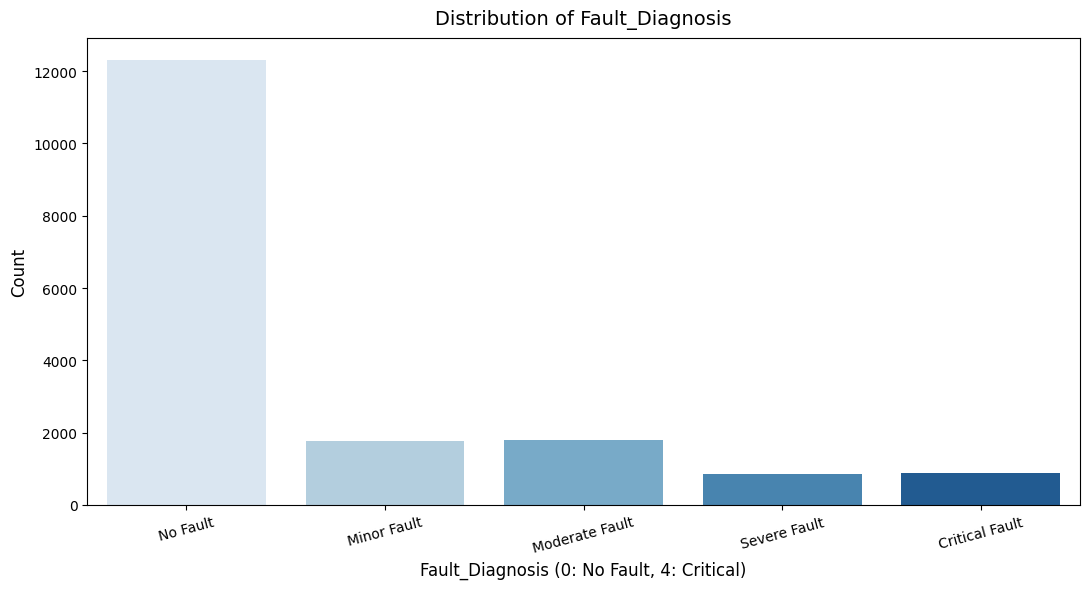

In [41]:
plt.figure(figsize=(11, 6))
sns.countplot(x='Fault_Diagnosis', data=dataset, palette='Blues')
plt.title('Distribution of Fault_Diagnosis', fontsize=14, pad=10)
plt.xlabel('Fault_Diagnosis (0: No Fault, 4: Critical)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(ticks=[0, 1, 2, 3, 4],
           labels=['No Fault', 'Minor Fault', 'Moderate Fault', 'Severe Fault', 'Critical Fault'],
           rotation=15)
plt.tight_layout()
plt.show()

In [42]:
dataset['Fault_Diagnosis'].value_counts()

Fault_Diagnosis
0.0    12301
2.0     1794
1.0     1762
4.0      885
3.0      866
Name: count, dtype: int64

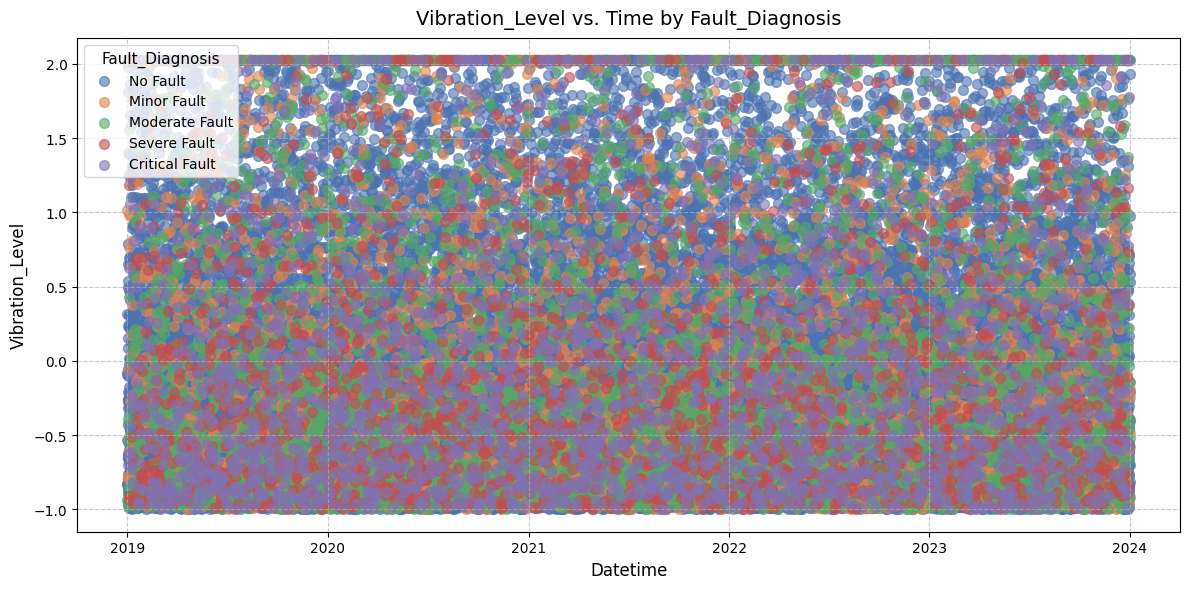

In [ ]:
fault_labels = {0: 'No Fault', 1: 'Minor Fault', 2: 'Moderate Fault', 3: 'Severe Fault', 4: 'Critical Fault'}
colors = sns.color_palette('deep', n_colors=5)  # Deep palette for distinct colors

# Create scatter plot
plt.figure(figsize=(12, 6))
for fault_value in range(5):
    # Filter data for each fault type
    fault_data = dataset[dataset['Fault_Diagnosis'] == fault_value]
    plt.scatter(fault_data['Datetime'], fault_data['Vibration_Level'],
                label=fault_labels[fault_value], color=colors[fault_value],
                alpha=0.6, s=50)  # Adjust size (s) and transparency (alpha)

plt.title('Vibration_Level vs. Time by Fault_Diagnosis', fontsize=14, pad=10)
plt.xlabel('Datetime', fontsize=12)
plt.ylabel('Vibration_Level', fontsize=12)
plt.legend(title='Fault_Diagnosis', fontsize=10, title_fontsize=11)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Numeric features selected: ['Vibration_Level', 'Temperature_Readings', 'Pressure_Data', 'Acoustic_Signals', 'Humidity_Levels', 'Motor_Speed', 'Torque_Data', 'Energy_Consumption', 'Production_Rate', 'Tool_Wear_Rate', 'Machine_Utilization_Rate', 'Cycle_Time_Per_Operation', 'Idle_Time', 'Machine_Load_Percentage', 'Ambient_Temperature', 'Humidity', 'Air_Quality_Index', 'Machine_Health_Index', 'Failure_Mode_Indicators', 'Maintenance_Logs', 'Previous_Fault_Occurrences', 'Predictive_Maintenance_Scores', 'Component_Degradation_Index', 'Real_Time_Performance_Index', 'Machine_Start_Stop_Events', 'Downtime_Incidents', 'Fault_Trigger_Timestamps', 'Controller_Setpoints', 'Actual_vs_Setpoint_Values', 'Alarm_Trigger_Data', 'Repair_Logs', 'Spare_Part_Usage', 'Anomaly_Scores', 'Fault_Probability', 'Quality_Control_Test_Results', 'Fault_Diagnosis', 'Shift_1', 'Shift_2', 'Shift_3', 'Hour', 'DayOfWeek', 'Month', 'Vibration_Level_lag1', 'Vibration_Level_lag2', 'Vibration_Level_rolling_mean', 'Vibration_Lev

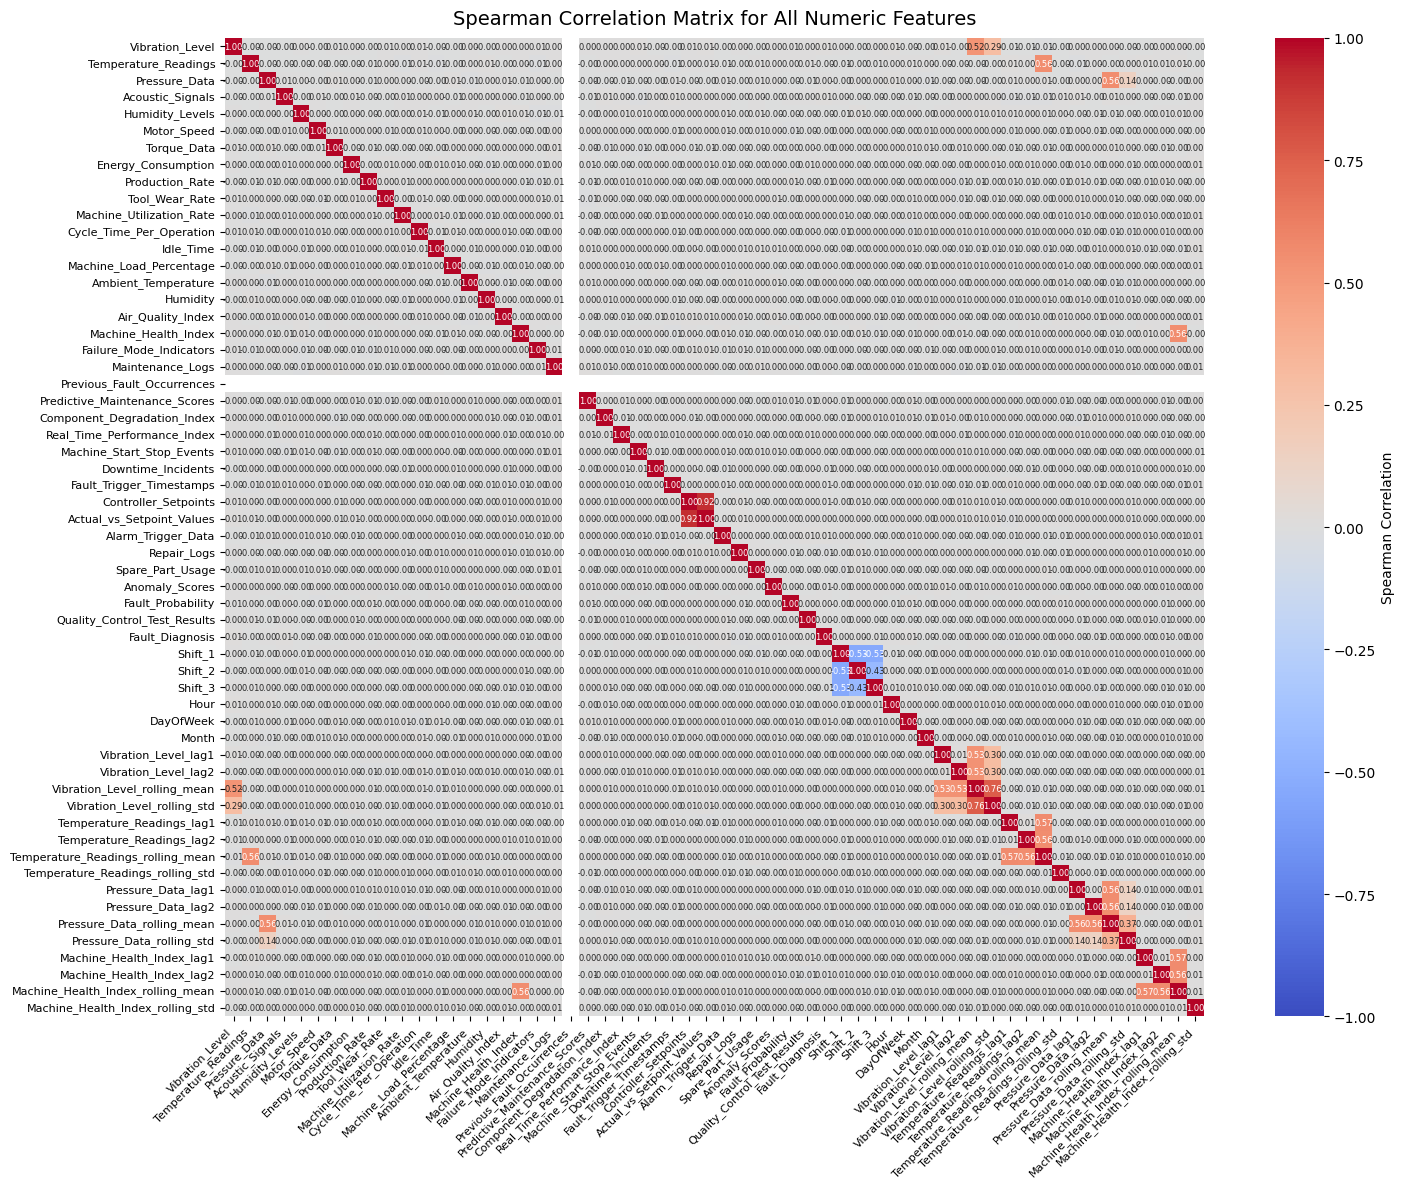

In [ ]:
numeric_cols = dataset.select_dtypes(include=['float64', 'int64', 'int32']).columns
print("Numeric features selected:", numeric_cols.tolist())

# Verify Fault_Diagnosis is included
if 'Fault_Diagnosis' not in numeric_cols:
    print("Warning: Fault_Diagnosis not found in numeric columns. Check dtype.")
    print("Fault_Diagnosis dtype:", df['Fault_Diagnosis'].dtype)

# Subset the DataFrame to numeric columns
df_numeric = dataset[numeric_cols]

# Compute Spearman correlation matrix
corr_matrix = df_numeric.corr(method='spearman')

# Create heatmap
plt.figure(figsize=(16, 12))  # Larger size for many features
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0,
            fmt='.2f', annot_kws={'size': 6}, square=True,
            cbar_kws={'label': 'Spearman Correlation'})
plt.title('Spearman Correlation Matrix for All Numeric Features', fontsize=14, pad=10)
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()

plt.savefig('full_correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

## Train Test Split

---



In [43]:
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

In [44]:
X = dataset.drop(columns=['Datetime', 'Fault_Diagnosis'])
y = dataset['Fault_Diagnosis']

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

## Model Evaluation

---



In [46]:
from sklearn.utils.class_weight import compute_class_weight

**XGBoost**

In [47]:
from xgboost import XGBClassifier
from itertools import cycle

In [ ]:
classes = np.unique(y)
class_weights = compute_class_weight('balanced', classes=classes, y=y)
class_weight_dict = dict(zip(classes, class_weights))

In [ ]:
if not X_train.columns.equals(X_test.columns):
    raise ValueError("Feature names in X_train and X_test do not match!")
print("X_train features:", X_train.columns.tolist())
print("X_test features:", X_test.columns.tolist())

X_train features: ['Vibration_Level', 'Temperature_Readings', 'Pressure_Data', 'Acoustic_Signals', 'Humidity_Levels', 'Motor_Speed', 'Torque_Data', 'Energy_Consumption', 'Production_Rate', 'Tool_Wear_Rate', 'Machine_Utilization_Rate', 'Cycle_Time_Per_Operation', 'Idle_Time', 'Machine_Load_Percentage', 'Ambient_Temperature', 'Humidity', 'Air_Quality_Index', 'Machine_Health_Index', 'Failure_Mode_Indicators', 'Maintenance_Logs', 'Previous_Fault_Occurrences', 'Predictive_Maintenance_Scores', 'Component_Degradation_Index', 'Real_Time_Performance_Index', 'Machine_Start_Stop_Events', 'Downtime_Incidents', 'Fault_Trigger_Timestamps', 'Controller_Setpoints', 'Actual_vs_Setpoint_Values', 'Alarm_Trigger_Data', 'Repair_Logs', 'Spare_Part_Usage', 'Anomaly_Scores', 'Fault_Probability', 'Quality_Control_Test_Results', 'Shift_1', 'Shift_2', 'Shift_3', 'Hour', 'DayOfWeek', 'Month', 'Vibration_Level_lag1', 'Vibration_Level_lag2', 'Vibration_Level_rolling_mean', 'Vibration_Level_rolling_std', 'Temperatur

In [ ]:
model = XGBClassifier(
    objective='multi:softmax',
    num_class=5,
    eval_metric='mlogloss',
    random_state=42
)
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_class=5, num_parallel_tree=None, ...)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred, target_names=['No Fault', 'Minor', 'Moderate', 'Severe', 'Critical']))

XGBoost Classification Report:
              precision    recall  f1-score   support

    No Fault       0.70      1.00      0.82      6106
       Minor       0.11      0.00      0.00       894
    Moderate       0.20      0.00      0.00       881
      Severe       0.00      0.00      0.00       438
    Critical       0.00      0.00      0.00       446

    accuracy                           0.70      8765
   macro avg       0.20      0.20      0.17      8765
weighted avg       0.52      0.70      0.57      8765



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


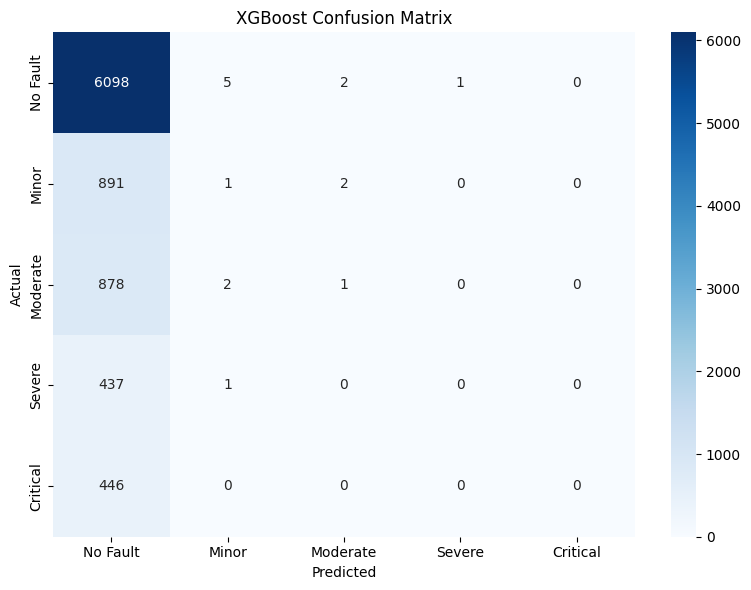

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Fault', 'Minor', 'Moderate', 'Severe', 'Critical'],
            yticklabels=['No Fault', 'Minor', 'Moderate', 'Severe', 'Critical'])
plt.title('XGBoost Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.savefig('xgboost_confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

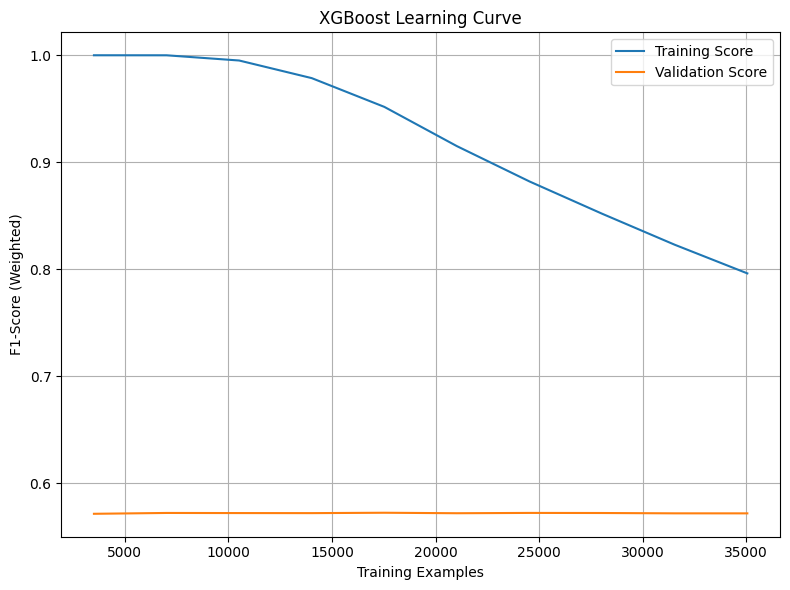

In [ ]:
train_sizes, train_scores, val_scores = learning_curve(model, X, y, cv=5, scoring='f1_weighted', n_jobs=-1,
                                                      train_sizes=np.linspace(0.1, 1.0, 10))
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training Score')
plt.plot(train_sizes, val_scores.mean(axis=1), label='Validation Score')
plt.title('XGBoost Learning Curve')
plt.xlabel('Training Examples')
plt.ylabel('F1-Score (Weighted)')
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.savefig('xgboost_learning_curve.png', dpi=300, bbox_inches='tight')
plt.show()

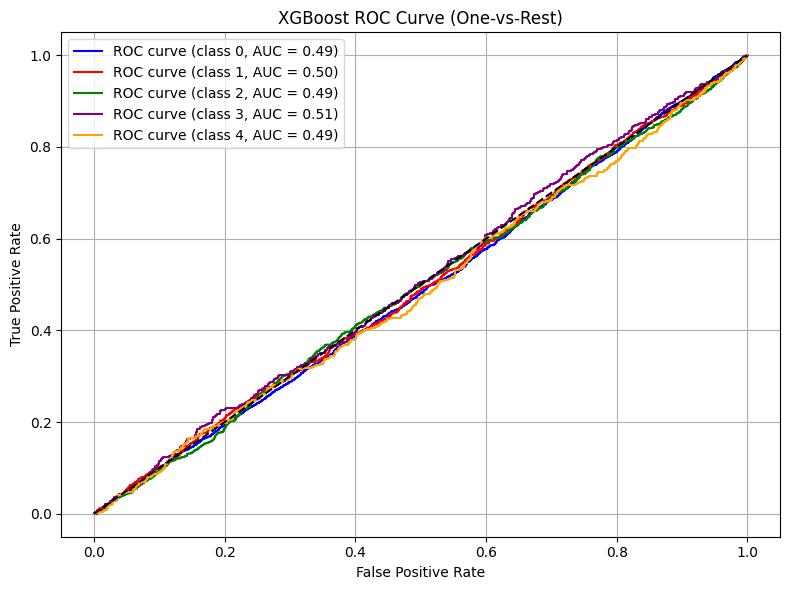

In [ ]:
y_score = model.predict_proba(X_test)
fpr, tpr, roc_auc = {}, {}, {}
for i in range(5):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))
colors = cycle(['blue', 'red', 'green', 'purple', 'orange'])
for i, color in zip(range(5), colors):
    plt.plot(fpr[i], tpr[i], color=color, label=f'ROC curve (class {i}, AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('XGBoost ROC Curve (One-vs-Rest)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.savefig('xgboost_roc_curve.png', dpi=300, bbox_inches='tight')
plt.show()

**LightGBM**

In [48]:
from lightgbm import LGBMClassifier

In [ ]:
model = LGBMClassifier(
    objective='multiclass',
    num_class=5,
    random_state=42,
    class_weight=class_weight_dict,
    verbose=-1
)

In [ ]:
model.fit(X_train, y_train)

LGBMClassifier(class_weight={np.int64(0): np.float64(0.2870815591221749),
                             np.int64(1): np.float64(1.9611993734616244),
                             np.int64(2): np.float64(1.9892419428052655),
                             np.int64(3): np.float64(4.003928734582001),
                             np.int64(4): np.float64(3.9320771646478243)},
               num_class=5, objective='multiclass', random_state=42,
               verbose=-1)

In [ ]:
y_pred = model.predict(X_test)
print("LightGBM Classification Report:")
print(classification_report(y_test, y_pred, target_names=['No Fault', 'Minor', 'Moderate', 'Severe', 'Critical']))

LightGBM Classification Report:
              precision    recall  f1-score   support

    No Fault       0.69      0.47      0.56      6106
       Minor       0.10      0.16      0.12       894
    Moderate       0.09      0.15      0.11       881
      Severe       0.04      0.08      0.06       438
    Critical       0.05      0.10      0.07       446

    accuracy                           0.37      8765
   macro avg       0.20      0.19      0.18      8765
weighted avg       0.51      0.37      0.42      8765



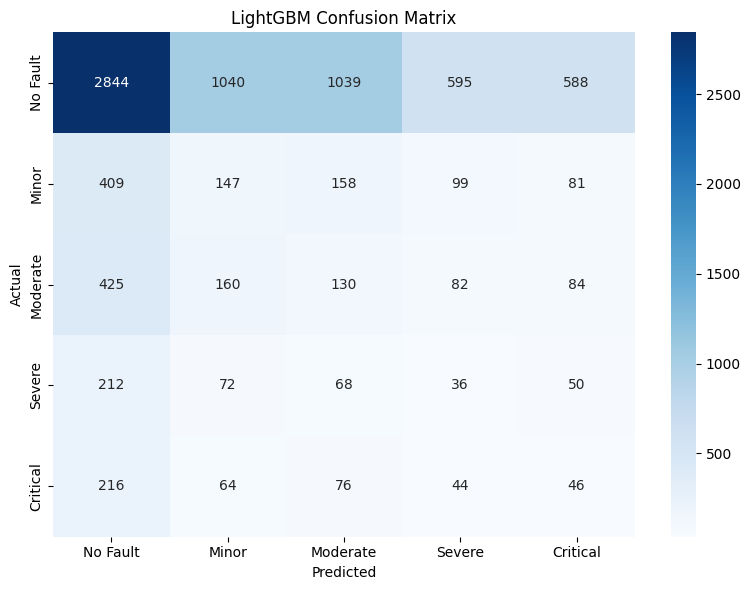

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Fault', 'Minor', 'Moderate', 'Severe', 'Critical'],
            yticklabels=['No Fault', 'Minor', 'Moderate', 'Severe', 'Critical'])
plt.title('LightGBM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.savefig('lightgbm_confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

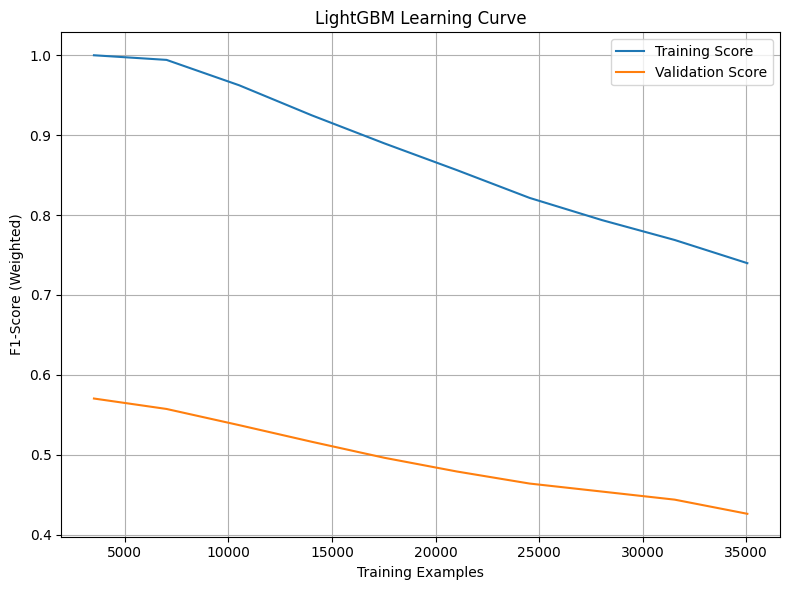

In [ ]:
train_sizes, train_scores, val_scores = learning_curve(model, X, y, cv=5, scoring='f1_weighted', n_jobs=-1,
                                                      train_sizes=np.linspace(0.1, 1.0, 10))
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training Score')
plt.plot(train_sizes, val_scores.mean(axis=1), label='Validation Score')
plt.title('LightGBM Learning Curve')
plt.xlabel('Training Examples')
plt.ylabel('F1-Score (Weighted)')
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.savefig('lightgbm_learning_curve.png', dpi=300, bbox_inches='tight')
plt.show()

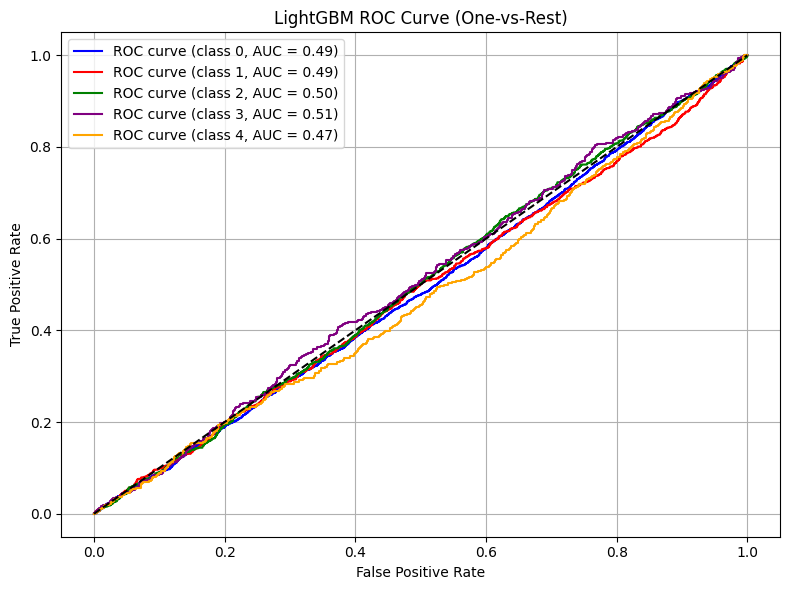

In [ ]:
y_score = model.predict_proba(X_test)
fpr, tpr, roc_auc = {}, {}, {}
for i in range(5):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))
colors = cycle(['blue', 'red', 'green', 'purple', 'orange'])
for i, color in zip(range(5), colors):
    plt.plot(fpr[i], tpr[i], color=color, label=f'ROC curve (class {i}, AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('LightGBM ROC Curve (One-vs-Rest)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.savefig('lightgbm_roc_curve.png', dpi=300, bbox_inches='tight')
plt.show()

Random **Forest**

In [49]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight=class_weight_dict
)

In [ ]:
model.fit(X_train, y_train)

RandomForestClassifier(class_weight={np.int64(0): np.float64(0.2870815591221749),
                                     np.int64(1): np.float64(1.9611993734616244),
                                     np.int64(2): np.float64(1.9892419428052655),
                                     np.int64(3): np.float64(4.003928734582001),
                                     np.int64(4): np.float64(3.9320771646478243)},
                       random_state=42)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred, target_names=['No Fault', 'Minor', 'Moderate', 'Severe', 'Critical']))

Random Forest Classification Report:
              precision    recall  f1-score   support

    No Fault       0.70      1.00      0.82      6106
       Minor       0.00      0.00      0.00       894
    Moderate       0.00      0.00      0.00       881
      Severe       0.00      0.00      0.00       438
    Critical       0.00      0.00      0.00       446

    accuracy                           0.70      8765
   macro avg       0.14      0.20      0.16      8765
weighted avg       0.49      0.70      0.57      8765



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


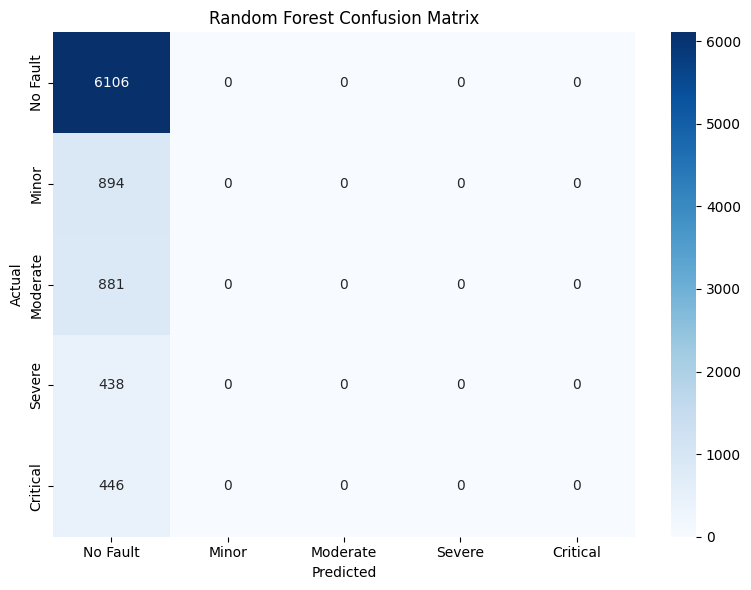

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Fault', 'Minor', 'Moderate', 'Severe', 'Critical'],
            yticklabels=['No Fault', 'Minor', 'Moderate', 'Severe', 'Critical'])
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.savefig('random_forest_confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

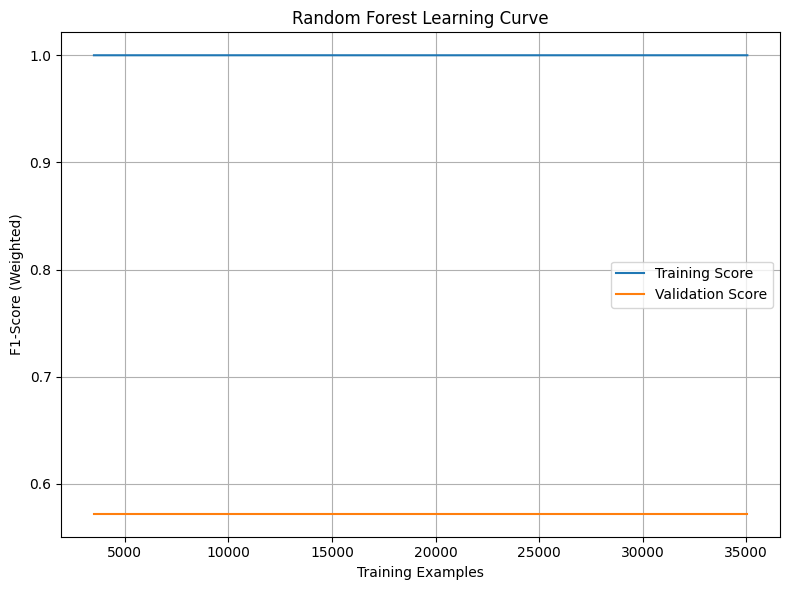

In [ ]:
train_sizes, train_scores, val_scores = learning_curve(model, X, y, cv=5, scoring='f1_weighted', n_jobs=-1,
                                                      train_sizes=np.linspace(0.1, 1.0, 10))
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training Score')
plt.plot(train_sizes, val_scores.mean(axis=1), label='Validation Score')
plt.title('Random Forest Learning Curve')
plt.xlabel('Training Examples')
plt.ylabel('F1-Score (Weighted)')
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.savefig('random_forest_learning_curve.png', dpi=300, bbox_inches='tight')
plt.show()

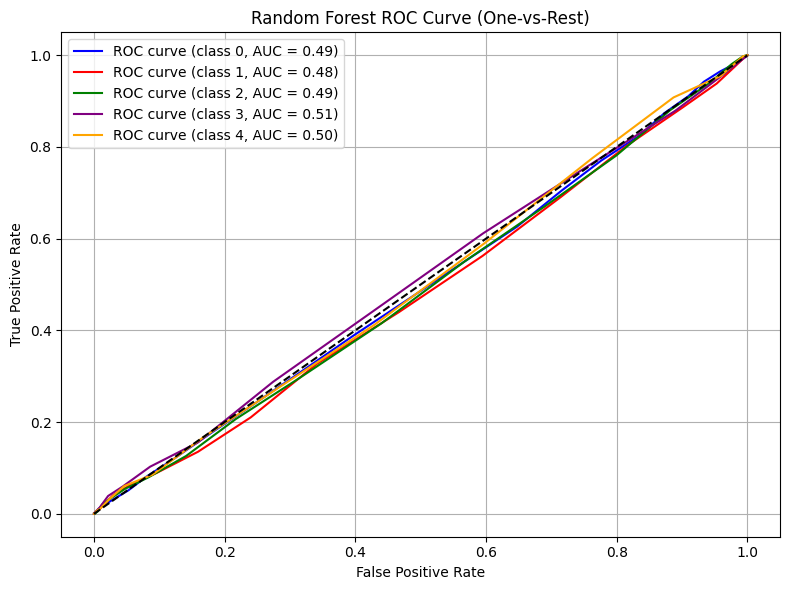

In [ ]:
y_score = model.predict_proba(X_test)
fpr, tpr, roc_auc = {}, {}, {}
for i in range(5):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))
colors = cycle(['blue', 'red', 'green', 'purple', 'orange'])
for i, color in zip(range(5), colors):
    plt.plot(fpr[i], tpr[i], color=color, label=f'ROC curve (class {i}, AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('Random Forest ROC Curve (One-vs-Rest)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.savefig('random_forest_roc_curve.png', dpi=300, bbox_inches='tight')
plt.show()

**CatBoost**

In [50]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 7.7 MB/s eta 0:00:00


In [51]:
from catboost import CatBoostClassifier

In [ ]:
model = CatBoostClassifier(
    iterations=500,
    depth=6,
    learning_rate=0.1,
    random_seed=42,
    auto_class_weights='Balanced',
    verbose=0
)

In [ ]:
model.fit(X_train, y_train)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print("CatBoost Classification Report:")
print(classification_report(y_test, y_pred, target_names=['No Fault', 'Minor', 'Moderate', 'Severe', 'Critical']))

CatBoost Classification Report:
              precision    recall  f1-score   support

    No Fault       0.70      0.35      0.47      6106
       Minor       0.10      0.19      0.13       894
    Moderate       0.09      0.19      0.13       881
      Severe       0.06      0.13      0.08       438
    Critical       0.05      0.12      0.07       446

    accuracy                           0.30      8765
   macro avg       0.20      0.20      0.17      8765
weighted avg       0.51      0.30      0.36      8765



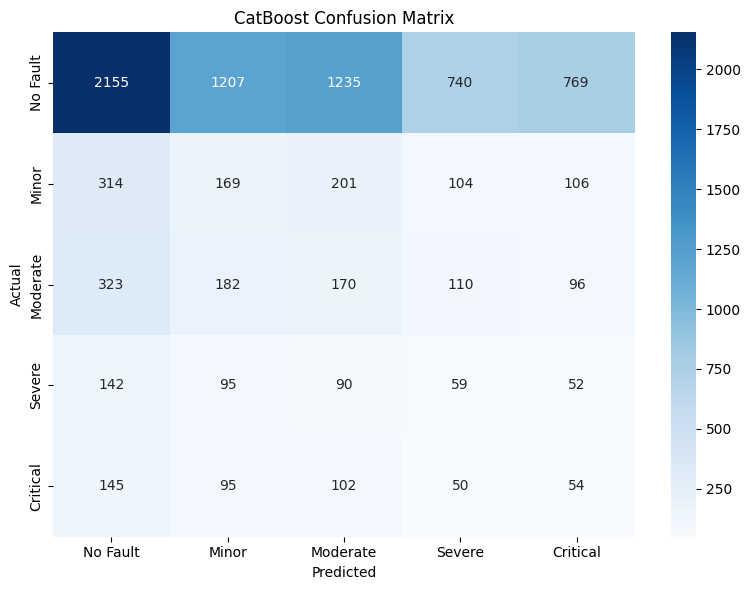

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Fault', 'Minor', 'Moderate', 'Severe', 'Critical'],
            yticklabels=['No Fault', 'Minor', 'Moderate', 'Severe', 'Critical'])
plt.title('CatBoost Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.savefig('catboost_confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

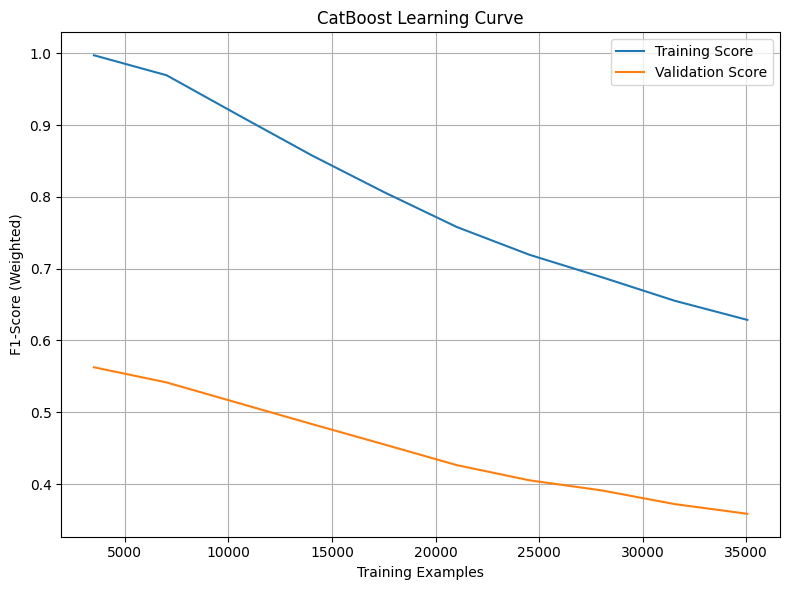

In [ ]:
train_sizes, train_scores, val_scores = learning_curve(model, X, y, cv=5, scoring='f1_weighted', n_jobs=-1,
                                                      train_sizes=np.linspace(0.1, 1.0, 10))
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training Score')
plt.plot(train_sizes, val_scores.mean(axis=1), label='Validation Score')
plt.title('CatBoost Learning Curve')
plt.xlabel('Training Examples')
plt.ylabel('F1-Score (Weighted)')
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.savefig('catboost_learning_curve.png', dpi=300, bbox_inches='tight')
plt.show()

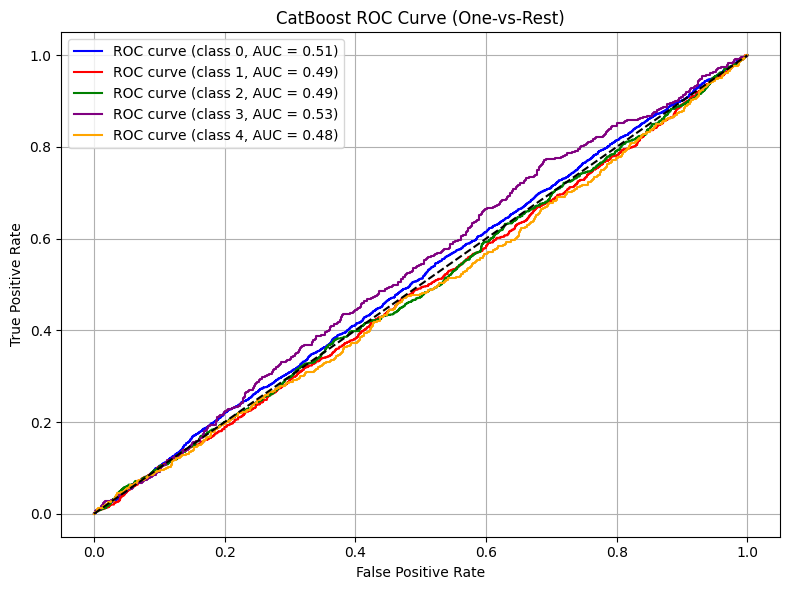

In [ ]:
y_score = model.predict_proba(X_test)
fpr, tpr, roc_auc = {}, {}, {}
for i in range(5):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))
colors = cycle(['blue', 'red', 'green', 'purple', 'orange'])
for i, color in zip(range(5), colors):
    plt.plot(fpr[i], tpr[i], color=color, label=f'ROC curve (class {i}, AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('CatBoost ROC Curve (One-vs-Rest)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.savefig('catboost_roc_curve.png', dpi=300, bbox_inches='tight')
plt.show()

Neural Network (MLP with PyTorch)



In [52]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

In [ ]:
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

In [ ]:
class MLP(nn.Module):
    def __init__(self, input_dim, hidden_dim=64, output_dim=5):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.3)
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        self.fc3 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [ ]:
model = MLP(input_dim=X_train.shape[1])
criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float32))
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
model.train()
for epoch in range(50):
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()

In [ ]:
model.eval()
with torch.no_grad():
    outputs = model(X_test_tensor)
    _, y_pred = torch.max(outputs, 1)
    y_score = torch.softmax(outputs, dim=1).numpy()

In [ ]:
print("MLP Classification Report:")
print(classification_report(y_test_tensor, y_pred.numpy(), target_names=['No Fault', 'Minor', 'Moderate', 'Severe', 'Critical']))

MLP Classification Report:
              precision    recall  f1-score   support

    No Fault       0.69      0.05      0.09      6106
       Minor       0.11      0.29      0.16       894
    Moderate       0.10      0.28      0.15       881
      Severe       0.05      0.24      0.08       438
    Critical       0.06      0.21      0.09       446

    accuracy                           0.11      8765
   macro avg       0.20      0.21      0.12      8765
weighted avg       0.51      0.11      0.10      8765



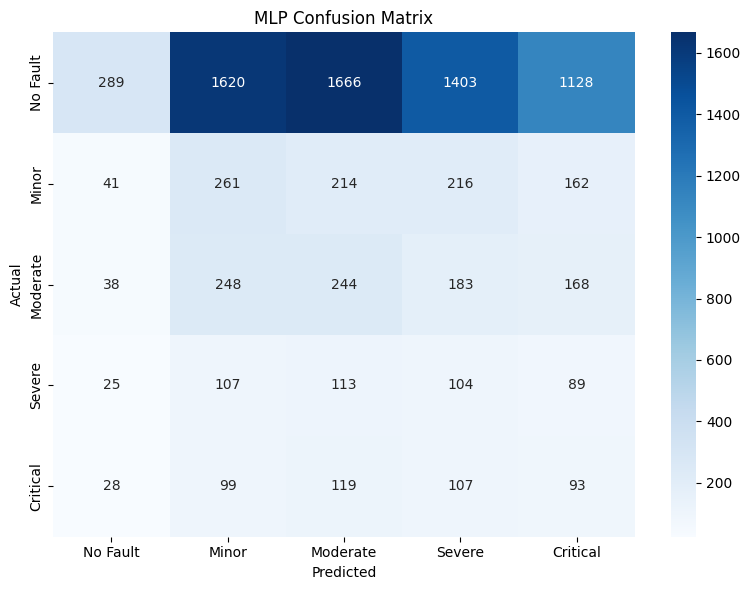

In [ ]:
cm = confusion_matrix(y_test_tensor, y_pred.numpy())
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Fault', 'Minor', 'Moderate', 'Severe', 'Critical'],
            yticklabels=['No Fault', 'Minor', 'Moderate', 'Severe', 'Critical'])
plt.title('MLP Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.savefig('mlp_confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

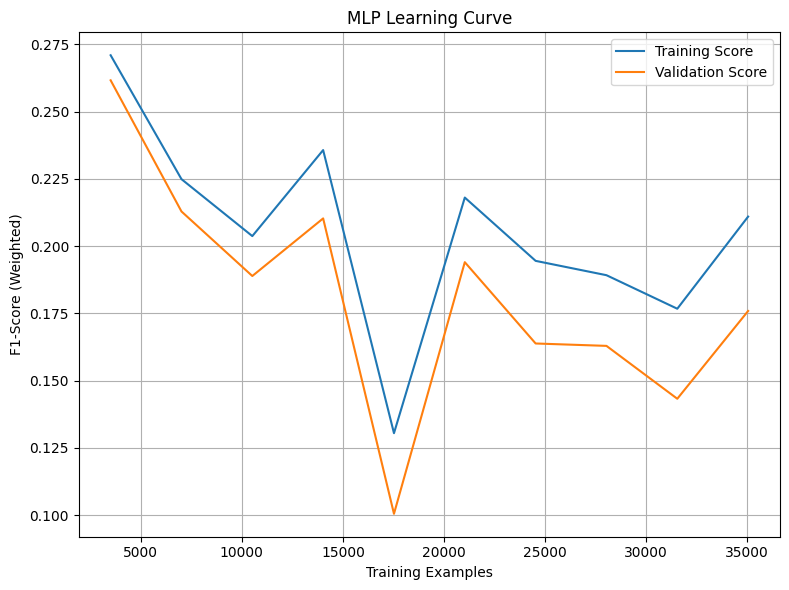

In [ ]:
train_sizes = np.linspace(0.1, 1.0, 10)
train_scores, val_scores = [], []
for size in train_sizes:
    train_subset = TensorDataset(X_train_tensor[:int(size * len(X_train_tensor))],
                                y_train_tensor[:int(size * len(y_train_tensor))])
    subset_loader = DataLoader(train_subset, batch_size=64, shuffle=True)
    model = MLP(input_dim=X_train.shape[1])
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    model.train()
    for epoch in range(20):  # Reduced epochs for speed
        for X_batch, y_batch in subset_loader:
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()

    model.eval()
    with torch.no_grad():
        train_outputs = model(X_train_tensor)
        train_pred = torch.max(train_outputs, 1)[1]
        train_f1 = f1_score(y_train, train_pred.numpy(), average='weighted')
        val_outputs = model(X_test_tensor)
        val_pred = torch.max(val_outputs, 1)[1]
        val_f1 = f1_score(y_test, val_pred.numpy(), average='weighted')
    train_scores.append(train_f1)
    val_scores.append(val_f1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes * len(X_train), train_scores, label='Training Score')
plt.plot(train_sizes * len(X_train), val_scores, label='Validation Score')
plt.title('MLP Learning Curve')
plt.xlabel('Training Examples')
plt.ylabel('F1-Score (Weighted)')
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.savefig('mlp_learning_curve.png', dpi=300, bbox_inches='tight')
plt.show()

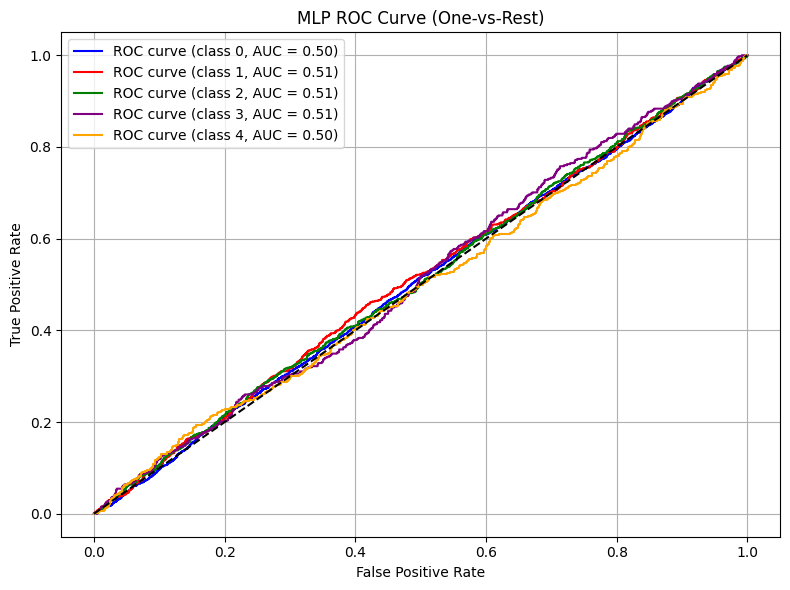

In [ ]:
fpr, tpr, roc_auc = {}, {}, {}
for i in range(5):
    fpr[i], tpr[i], _ = roc_curve(y_test_tensor == i, y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))
colors = cycle(['blue', 'red', 'green', 'purple', 'orange'])
for i, color in zip(range(5), colors):
    plt.plot(fpr[i], tpr[i], color=color, label=f'ROC curve (class {i}, AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('MLP ROC Curve (One-vs-Rest)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.savefig('mlp_roc_curve.png', dpi=300, bbox_inches='tight')
plt.show()

## Feature Selection

---



In [53]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [54]:
import shap

In [ ]:
if not X_train.columns.equals(X_test.columns):
    raise ValueError("Feature names in X_train and X_test do not match!")
print("X_train features:", X_train.columns.tolist())
print("X_test features:", X_test.columns.tolist())

X_train features: ['Vibration_Level', 'Temperature_Readings', 'Pressure_Data', 'Acoustic_Signals', 'Humidity_Levels', 'Motor_Speed', 'Torque_Data', 'Energy_Consumption', 'Production_Rate', 'Tool_Wear_Rate', 'Machine_Utilization_Rate', 'Cycle_Time_Per_Operation', 'Idle_Time', 'Machine_Load_Percentage', 'Ambient_Temperature', 'Humidity', 'Air_Quality_Index', 'Machine_Health_Index', 'Failure_Mode_Indicators', 'Maintenance_Logs', 'Previous_Fault_Occurrences', 'Predictive_Maintenance_Scores', 'Component_Degradation_Index', 'Real_Time_Performance_Index', 'Machine_Start_Stop_Events', 'Downtime_Incidents', 'Fault_Trigger_Timestamps', 'Controller_Setpoints', 'Actual_vs_Setpoint_Values', 'Alarm_Trigger_Data', 'Repair_Logs', 'Spare_Part_Usage', 'Anomaly_Scores', 'Fault_Probability', 'Quality_Control_Test_Results', 'Shift_1', 'Shift_2', 'Shift_3', 'Hour', 'DayOfWeek', 'Month', 'Vibration_Level_lag1', 'Vibration_Level_lag2', 'Vibration_Level_rolling_mean', 'Vibration_Level_rolling_std', 'Temperatur

In [ ]:
model = XGBClassifier(
    objective='multi:softmax',
    num_class=5,
    eval_metric='mlogloss',
    random_state=42
)

In [ ]:
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_class=5, num_parallel_tree=None, ...)

In [ ]:
explainer = shap.TreeExplainer(model)

<ipython-input-97-beab167f02f1>:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  X_test_sample = X_test_y.groupby('Fault_Diagnosis').apply(


<Figure size 1000x600 with 0 Axes>

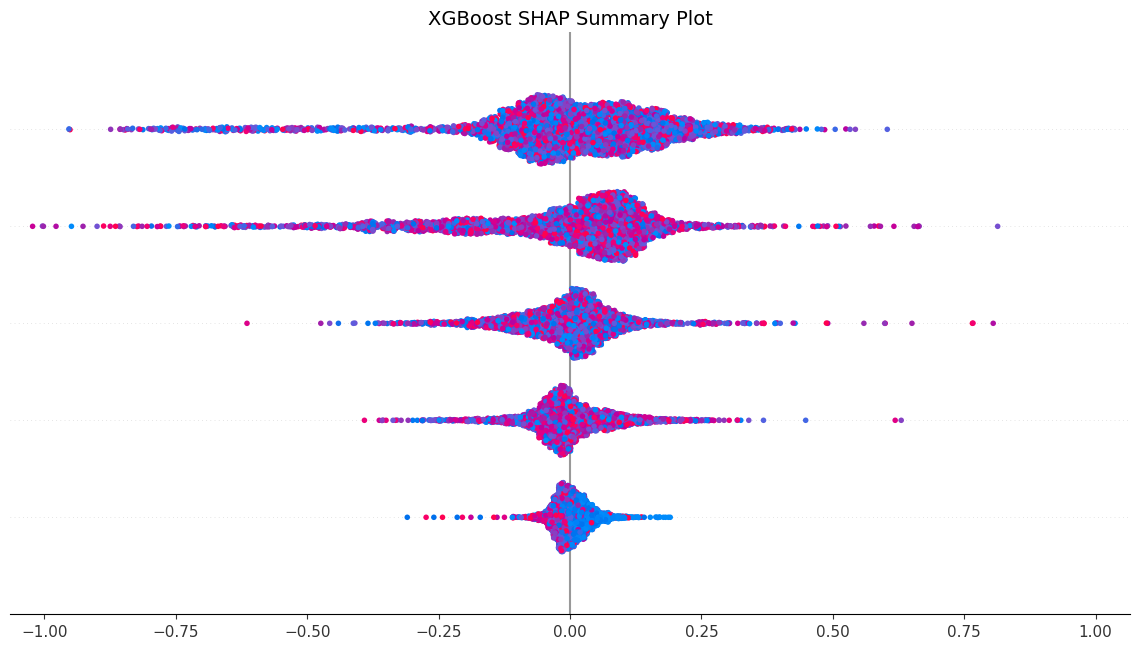

In [ ]:
X_test_y = X_test.copy()
X_test_y['Fault_Diagnosis'] = y_test
X_test_sample = X_test_y.groupby('Fault_Diagnosis').apply(
    lambda x: x.sample(n=int(5000/len(classes)), random_state=42) if len(x) >= int(5000/len(classes)) else x
).reset_index(drop=True)
y_test_sample = X_test_sample['Fault_Diagnosis']
X_test_sample = X_test_sample.drop(columns=['Fault_Diagnosis'])
shap_values = explainer.shap_values(X_test_sample)

# Summary plot (beeswarm)
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_test_sample, show=False)
plt.title('XGBoost SHAP Summary Plot', fontsize=14)
plt.tight_layout()
plt.savefig('xgboost_shap_summary.png', dpi=300, bbox_inches='tight')
plt.show()

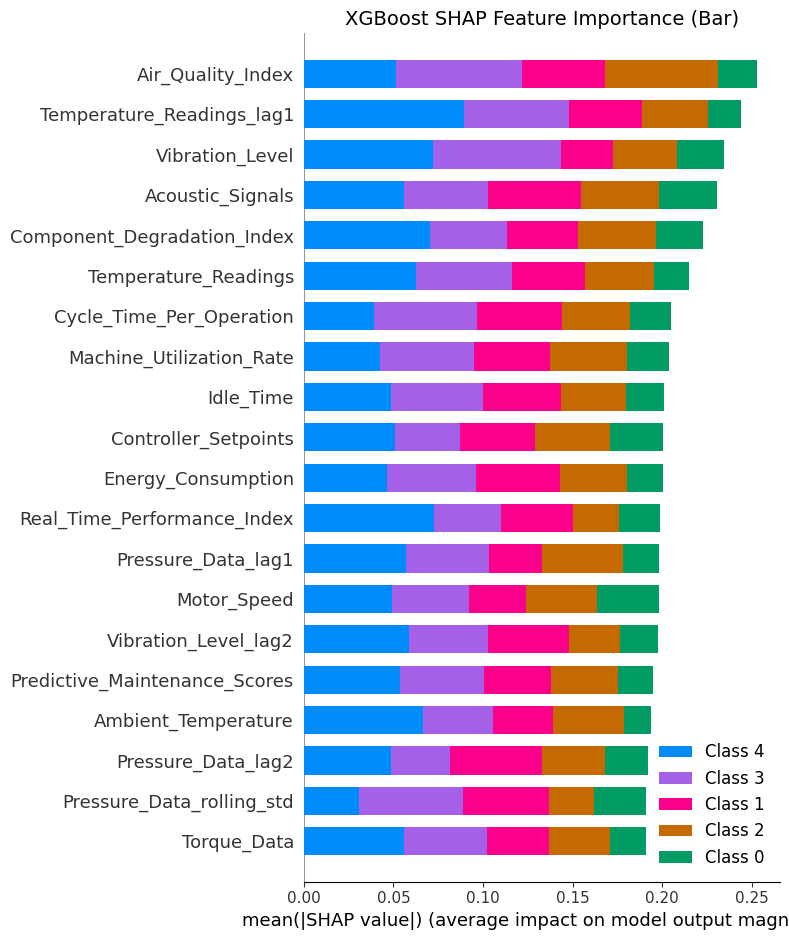

In [ ]:
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_test_sample, plot_type='bar', show=False)
plt.title('XGBoost SHAP Feature Importance (Bar)', fontsize=14)
plt.tight_layout()
plt.savefig('xgboost_shap_bar.png', dpi=300, bbox_inches='tight')
plt.show()

In [55]:
import xgboost as xgb

In [ ]:
model = xgb.XGBClassifier(random_state=42)
model.fit(X, y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
explainer = shap.Explainer(model, X)

In [ ]:
shap_values = explainer(X)

100%|===================| 219097/219115 [97:08<00:00]       

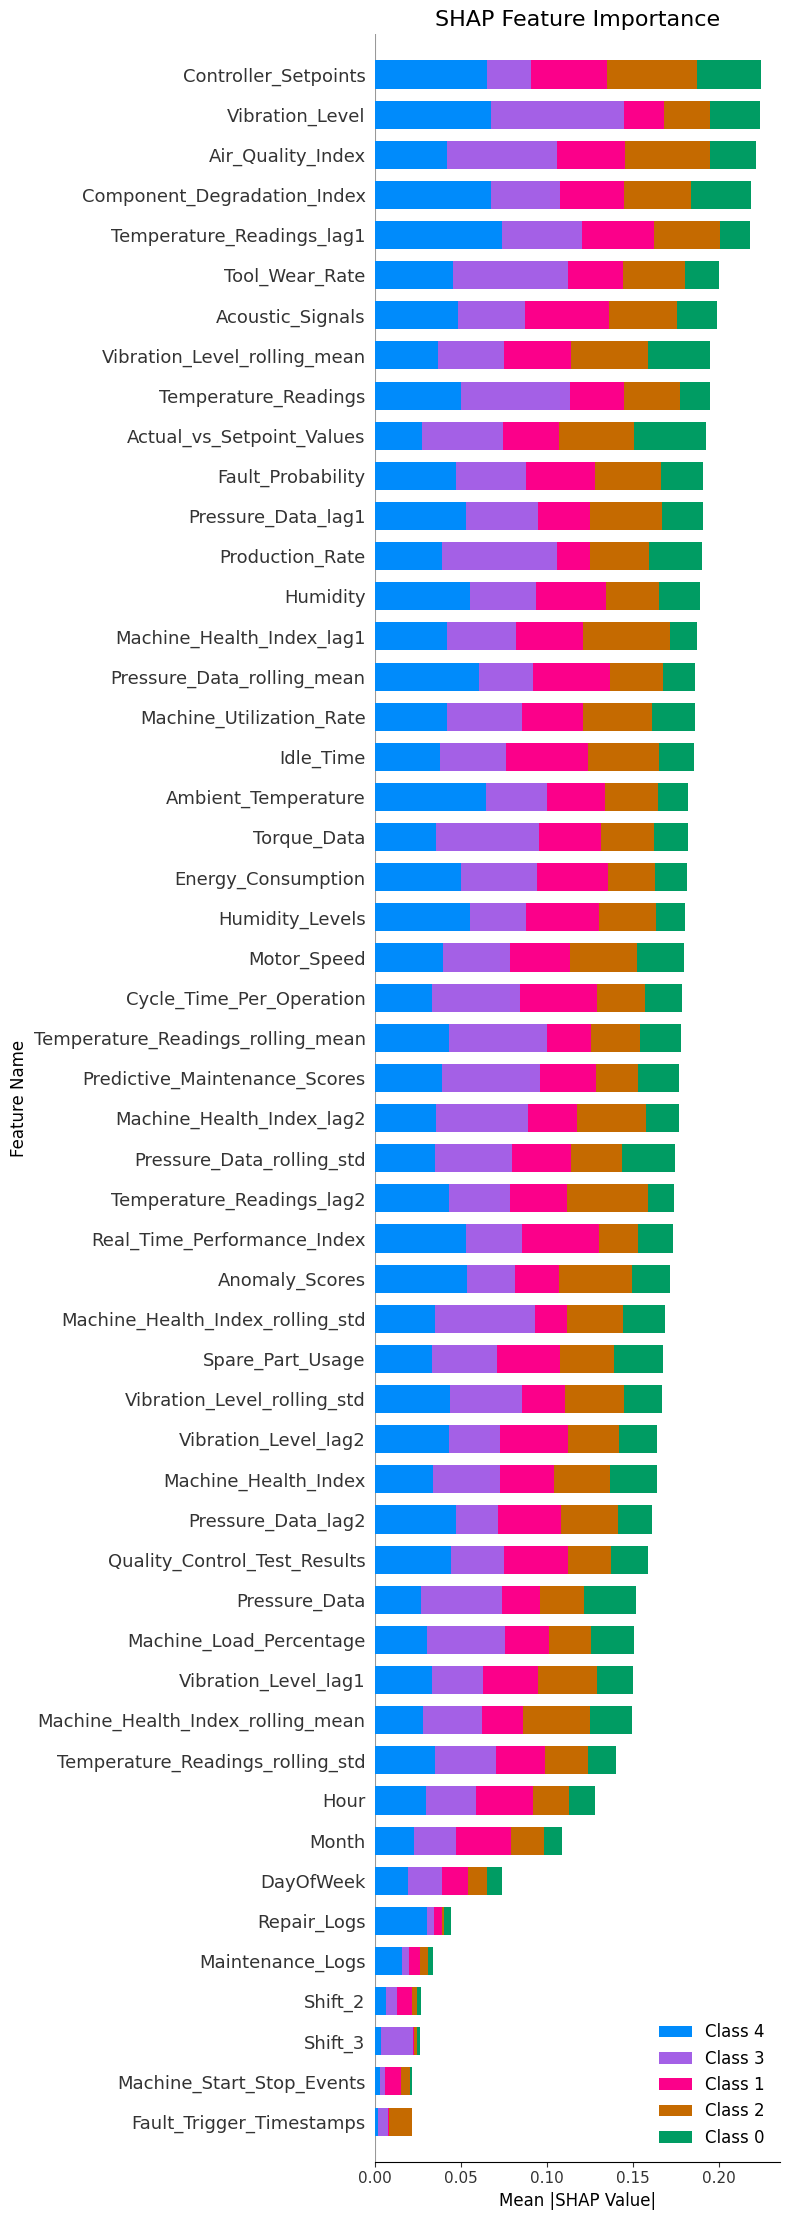

In [ ]:
shap.summary_plot(shap_values.values, X, plot_type="bar", max_display=52, show=False)


plt.title("SHAP Feature Importance", fontsize=16)
plt.xlabel("Mean |SHAP Value|", fontsize=12)
plt.ylabel("Feature Name", fontsize=12)
plt.tight_layout()
plt.savefig("shap_feature_importance.png", dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
correlation = dataset.corr(method='spearman')

In [ ]:
target_corr = correlation['Fault_Diagnosis'].drop('Fault_Diagnosis')


In [ ]:
target_corr_sorted = target_corr.reindex(target_corr.abs().sort_values(ascending=False).index)

In [ ]:
print("Spearman correlation with Fault_Diagnosis:")
print(target_corr_sorted)

Spearman correlation with Fault_Diagnosis:
Temperature_Readings_lag1           -0.008854
Alarm_Trigger_Data                   0.008683
DayOfWeek                            0.008589
Vibration_Level                      0.008192
Repair_Logs                         -0.008116
Acoustic_Signals                     0.008008
Anomaly_Scores                       0.007309
Pressure_Data_lag2                  -0.007230
Fault_Trigger_Timestamps             0.006956
Production_Rate                     -0.006859
Machine_Health_Index                -0.006809
Machine_Health_Index_lag2            0.006801
Downtime_Incidents                  -0.006521
Shift_3                             -0.005575
Controller_Setpoints                 0.005102
Humidity                             0.004934
Air_Quality_Index                   -0.004858
Temperature_Readings_lag2            0.004764
Vibration_Level_lag1                -0.004575
Month                               -0.004279
Fault_Probability                    

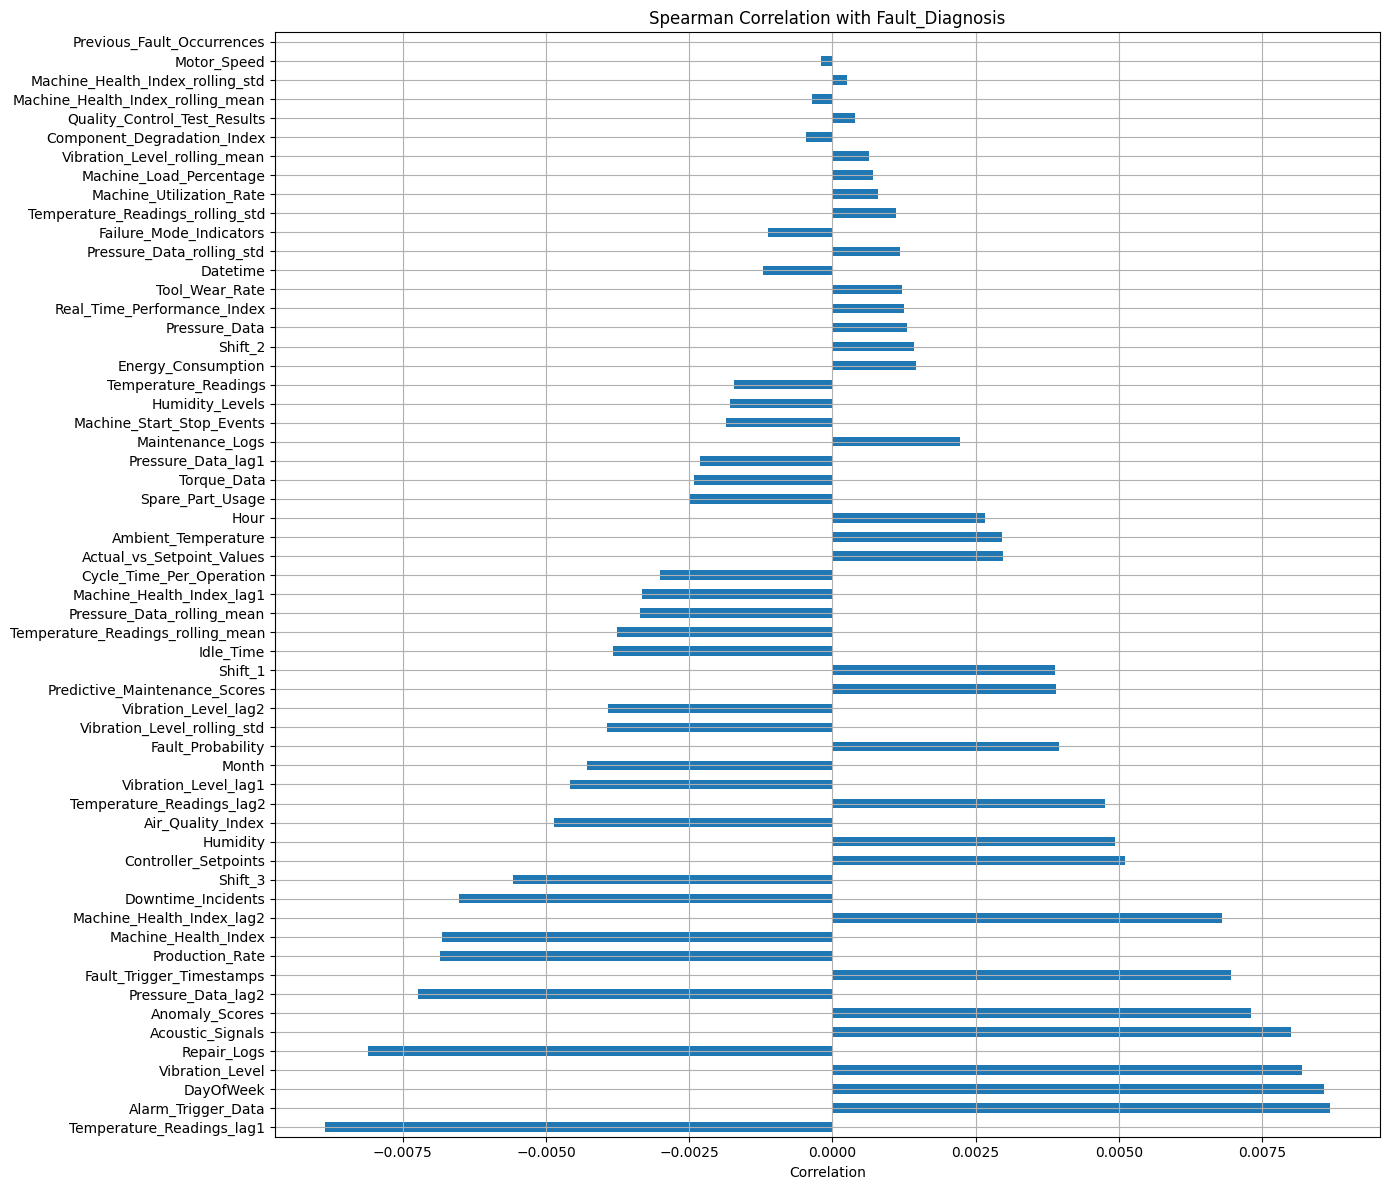

In [ ]:
target_corr_sorted.plot(kind='barh', figsize=(14, 12))
plt.title("Spearman Correlation with Fault_Diagnosis")
plt.xlabel("Correlation")
plt.grid(True)
plt.tight_layout()
plt.savefig("Spearman Correaltion with Fault_Diagnosis.png", dpi=300, bbox_inches='tight')
plt.show()

**Feature to Drop**

In [56]:
top_30_features = [
    'Controller_Setpoints', 'Vibration_Level', 'Air_Quality_Index', 'Component_Degradation_Index',
    'Temperature_Readings_lag1', 'Tool_Wear_Rate', 'Acoustic_Signals', 'Vibration_Level_rolling_mean',
    'Temperature_Readings', 'Actual_vs_Setpoint_Values', 'Fault_Probability', 'Pressure_Data_lag1',
    'Production_Rate', 'Humidity', 'Machine_Health_Index_lag1', 'Pressure_Data_rolling_mean',
    'Machine_Utilization_Rate', 'Idle_Time', 'Ambient_Temperature', 'Torque_Data',
    'Energy_Consumption', 'Humidity_Levels', 'Motor_Speed', 'Cycle_Time_Per_Operation',
    'Temperature_Readings_rolling_mean', 'Predictive_Maintenance_Scores', 'Machine_Health_Index_lag2',
    'Pressure_Data_rolling_std', 'Temperature_Readings_lag2', 'Real_Time_Performance_Index'
]


In [57]:
features_to_drop = [col for col in dataset.columns if col not in top_30_features and col not in ['Fault_Diagnosis', 'Datetime']]
df_reduced = dataset.drop(columns=features_to_drop)

In [58]:
print("Dropped Features:")
print(features_to_drop)

Dropped Features:
['Pressure_Data', 'Machine_Load_Percentage', 'Machine_Health_Index', 'Failure_Mode_Indicators', 'Maintenance_Logs', 'Previous_Fault_Occurrences', 'Machine_Start_Stop_Events', 'Downtime_Incidents', 'Fault_Trigger_Timestamps', 'Alarm_Trigger_Data', 'Repair_Logs', 'Spare_Part_Usage', 'Anomaly_Scores', 'Quality_Control_Test_Results', 'Shift_1.0', 'Shift_2.0', 'Shift_3.0', 'Hour', 'DayOfWeek', 'Month', 'Vibration_Level_lag1', 'Vibration_Level_lag2', 'Vibration_Level_rolling_std', 'Temperature_Readings_rolling_std', 'Pressure_Data_lag2', 'Machine_Health_Index_rolling_mean', 'Machine_Health_Index_rolling_std']


## Model Evaluation after Feature Selection

---



In [59]:
target = 'Fault_Diagnosis'
non_features = ['Datetime']
X_fs = dataset[top_30_features]
y_fs = dataset[target]

X_train_fs, X_test_fs, y_train_fs, y_test_fs = train_test_split(
    X_fs, y_fs, test_size=0.2, random_state=42, stratify=y_fs
)

**XGBoost**

In [ ]:
xgb_model = XGBClassifier(
    objective='multi:softmax',
    num_class=5,
    eval_metric='mlogloss',
    random_state=42
)
xgb_model.fit(X_train_fs, y_train_fs)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_class=5, num_parallel_tree=None, ...)

In [ ]:
y_pred = xgb_model.predict(X_test_fs)

In [ ]:
print("XGBoost Classification Report:")
print(classification_report(y_test_fs, y_pred, target_names=['No Fault', 'Minor', 'Moderate', 'Severe', 'Critical']))

XGBoost Classification Report:
              precision    recall  f1-score   support

    No Fault       0.70      1.00      0.82      6106
       Minor       0.00      0.00      0.00       894
    Moderate       0.19      0.00      0.01       881
      Severe       0.00      0.00      0.00       438
    Critical       0.00      0.00      0.00       446

    accuracy                           0.69      8765
   macro avg       0.18      0.20      0.17      8765
weighted avg       0.50      0.69      0.57      8765



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


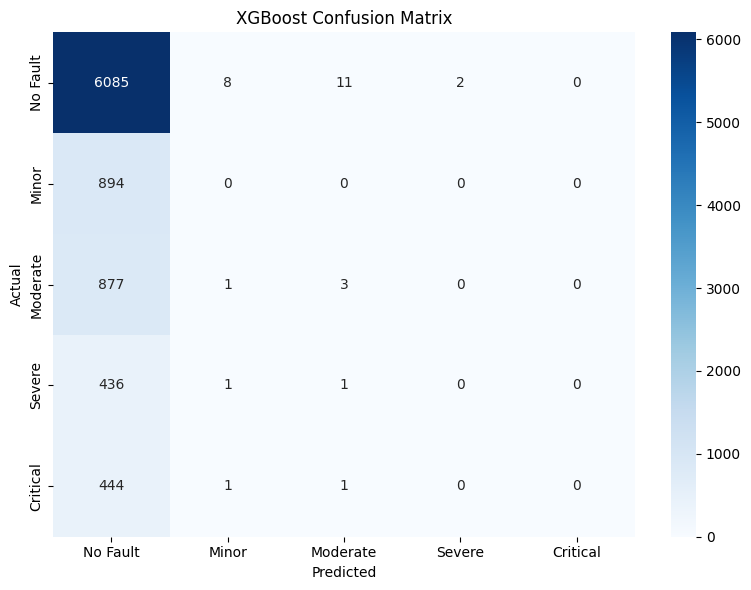

In [ ]:
cm = confusion_matrix(y_test_fs, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Fault', 'Minor', 'Moderate', 'Severe', 'Critical'],
            yticklabels=['No Fault', 'Minor', 'Moderate', 'Severe', 'Critical'])
plt.title('XGBoost Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.savefig('xgboost_confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

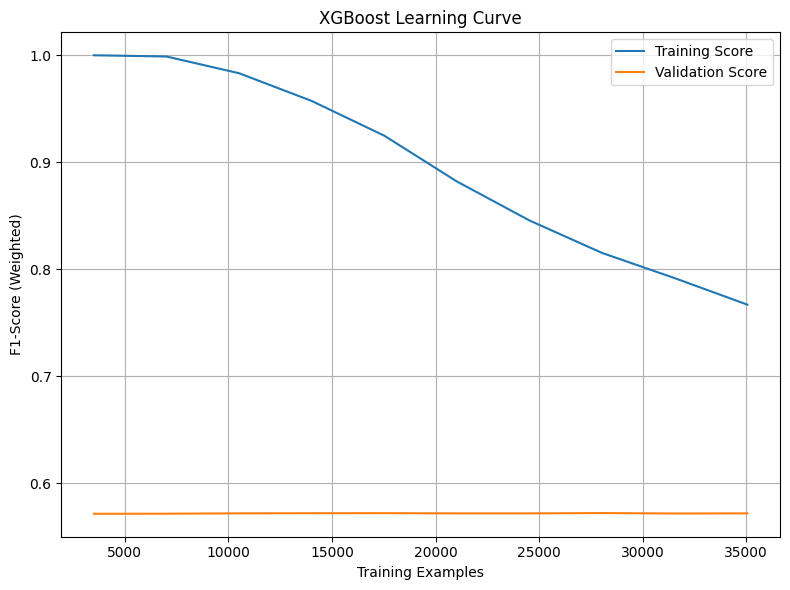

In [ ]:
train_sizes, train_scores, val_scores = learning_curve(xgb_model, X_fs, y_fs, cv=5, scoring='f1_weighted', n_jobs=-1,
                                                      train_sizes=np.linspace(0.1, 1.0, 10))
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training Score')
plt.plot(train_sizes, val_scores.mean(axis=1), label='Validation Score')
plt.title('XGBoost Learning Curve')
plt.xlabel('Training Examples')
plt.ylabel('F1-Score (Weighted)')
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.savefig('xgboost_learning_curve.png', dpi=300, bbox_inches='tight')
plt.show()

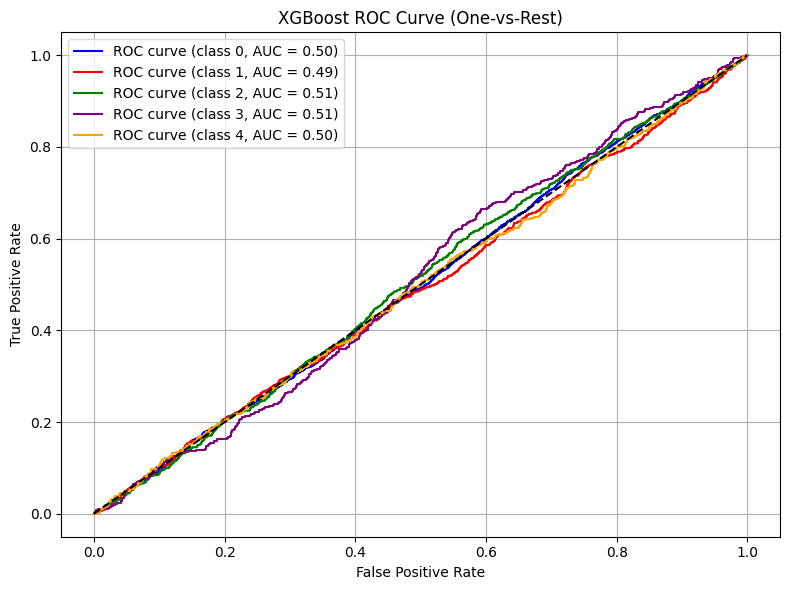

In [ ]:
y_score = xgb_model.predict_proba(X_test_fs)
fpr, tpr, roc_auc = {}, {}, {}
for i in range(5):
    fpr[i], tpr[i], _ = roc_curve(y_test_fs == i, y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))
colors = cycle(['blue', 'red', 'green', 'purple', 'orange'])
for i, color in zip(range(5), colors):
    plt.plot(fpr[i], tpr[i], color=color, label=f'ROC curve (class {i}, AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('XGBoost ROC Curve (One-vs-Rest)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.savefig('xgboost_roc_curve.png', dpi=300, bbox_inches='tight')
plt.show()

**LightGBM**

In [ ]:
classes = np.unique(y)
class_weights = compute_class_weight('balanced', classes=classes, y=y_fs)
class_weight_dict = dict(zip(classes, class_weights))

In [ ]:
model = LGBMClassifier(
    objective='multiclass',
    num_class=5,
    random_state=42,
    class_weight=class_weight_dict,
    verbose=-1
)

In [ ]:
model.fit(X_train_fs, y_train_fs)

LGBMClassifier(class_weight={np.int64(0): np.float64(0.2870815591221749),
                             np.int64(1): np.float64(1.9611993734616244),
                             np.int64(2): np.float64(1.9892419428052655),
                             np.int64(3): np.float64(4.003928734582001),
                             np.int64(4): np.float64(3.9320771646478243)},
               num_class=5, objective='multiclass', random_state=42,
               verbose=-1)

In [ ]:
y_pred = model.predict(X_test_fs)

In [ ]:
print("LightGBM Classification Report:")
print(classification_report(y_test_fs, y_pred, target_names=['No Fault', 'Minor', 'Moderate', 'Severe', 'Critical']))

LightGBM Classification Report:
              precision    recall  f1-score   support

    No Fault       0.70      0.43      0.54      6106
       Minor       0.11      0.19      0.14       894
    Moderate       0.09      0.17      0.12       881
      Severe       0.05      0.11      0.07       438
    Critical       0.04      0.08      0.05       446

    accuracy                           0.35      8765
   macro avg       0.20      0.20      0.18      8765
weighted avg       0.51      0.35      0.41      8765



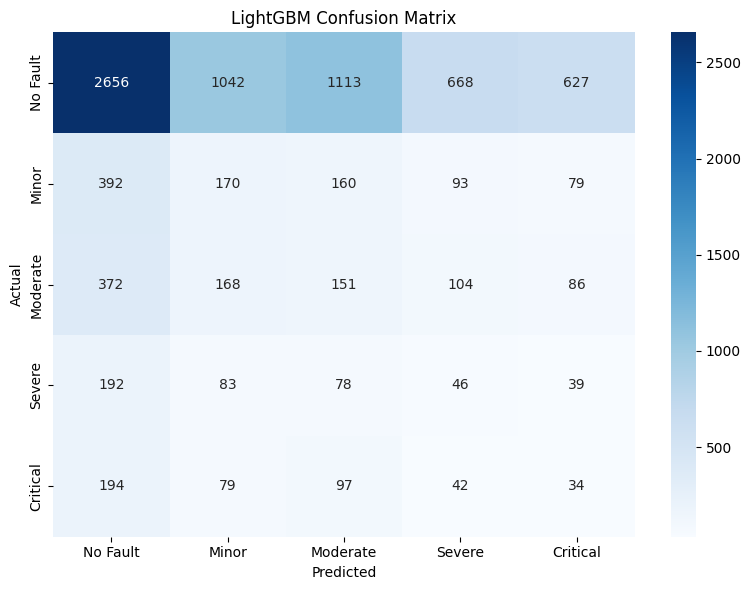

In [ ]:
cm = confusion_matrix(y_test_fs, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Fault', 'Minor', 'Moderate', 'Severe', 'Critical'],
            yticklabels=['No Fault', 'Minor', 'Moderate', 'Severe', 'Critical'])
plt.title('LightGBM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.savefig('lightgbm_confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

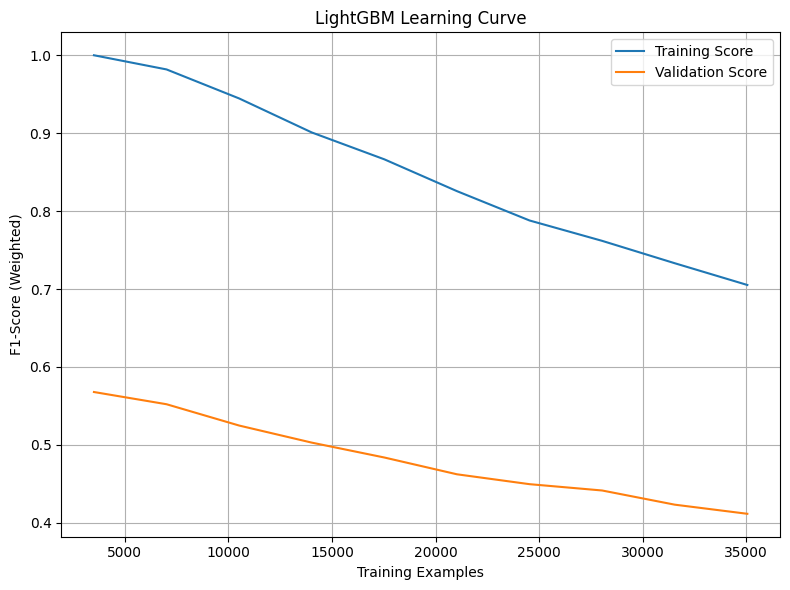

In [ ]:
train_sizes, train_scores, val_scores = learning_curve(model, X_fs, y_fs, cv=5, scoring='f1_weighted', n_jobs=-1,
                                                      train_sizes=np.linspace(0.1, 1.0, 10))
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training Score')
plt.plot(train_sizes, val_scores.mean(axis=1), label='Validation Score')
plt.title('LightGBM Learning Curve')
plt.xlabel('Training Examples')
plt.ylabel('F1-Score (Weighted)')
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.savefig('lightgbm_learning_curve.png', dpi=300, bbox_inches='tight')
plt.show()

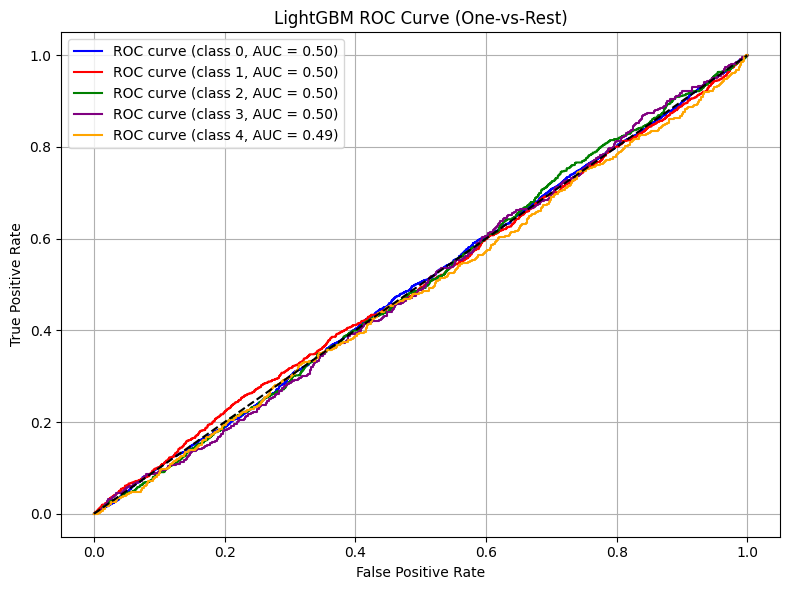

In [ ]:
y_score = model.predict_proba(X_test_fs)
fpr, tpr, roc_auc = {}, {}, {}
for i in range(5):
    fpr[i], tpr[i], _ = roc_curve(y_test_fs == i, y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))
colors = cycle(['blue', 'red', 'green', 'purple', 'orange'])
for i, color in zip(range(5), colors):
    plt.plot(fpr[i], tpr[i], color=color, label=f'ROC curve (class {i}, AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('LightGBM ROC Curve (One-vs-Rest)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.savefig('lightgbm_roc_curve.png', dpi=300, bbox_inches='tight')
plt.show()

**Random Forest**

In [ ]:
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight=class_weight_dict
)
rf_model.fit(X_train_fs, y_train_fs)
y_pred = rf_model.predict(X_test_fs)

In [ ]:
print("Random Forest Classification Report")
print(classification_report(y_test_fs, y_pred, target_names=['No Fault', 'Minor', 'Moderate', 'Severe', 'Critical']))

Random Forest Classification Report
              precision    recall  f1-score   support

    No Fault       0.70      1.00      0.82      6106
       Minor       0.00      0.00      0.00       894
    Moderate       0.00      0.00      0.00       881
      Severe       0.00      0.00      0.00       438
    Critical       0.00      0.00      0.00       446

    accuracy                           0.70      8765
   macro avg       0.14      0.20      0.16      8765
weighted avg       0.49      0.70      0.57      8765



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


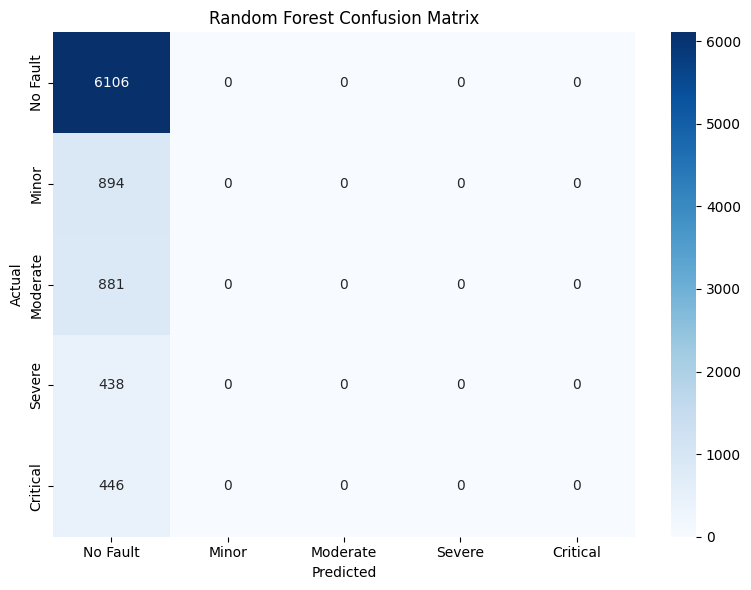

In [ ]:
cm = confusion_matrix(y_test_fs, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Fault', 'Minor', 'Moderate', 'Severe', 'Critical'],
            yticklabels=['No Fault', 'Minor', 'Moderate', 'Severe', 'Critical'])
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.savefig('random_forest_confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

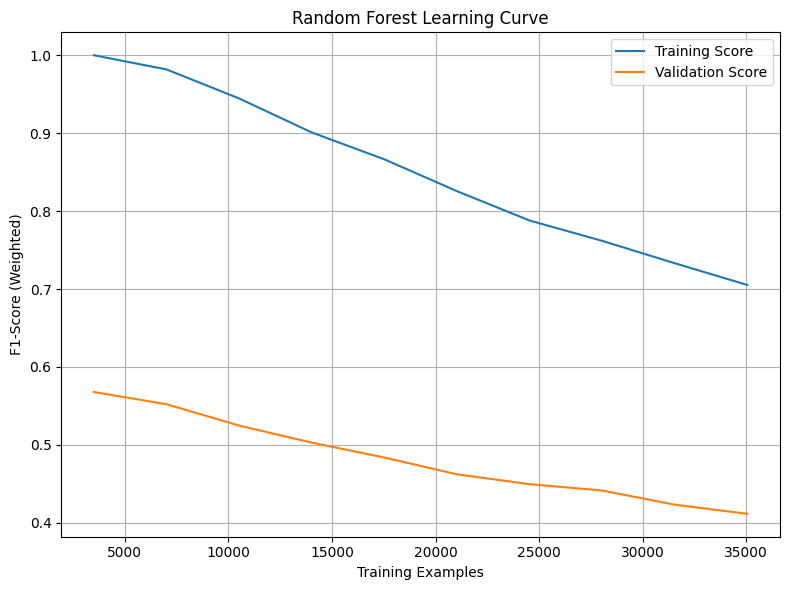

In [ ]:
train_sizes, train_scores, val_scores = learning_curve(model, X_fs, y_fs, cv=5, scoring='f1_weighted', n_jobs=-1,
                                                      train_sizes=np.linspace(0.1, 1.0, 10))
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training Score')
plt.plot(train_sizes, val_scores.mean(axis=1), label='Validation Score')
plt.title('Random Forest Learning Curve')
plt.xlabel('Training Examples')
plt.ylabel('F1-Score (Weighted)')
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.savefig('random_forest_learning_curve.png', dpi=300, bbox_inches='tight')
plt.show()

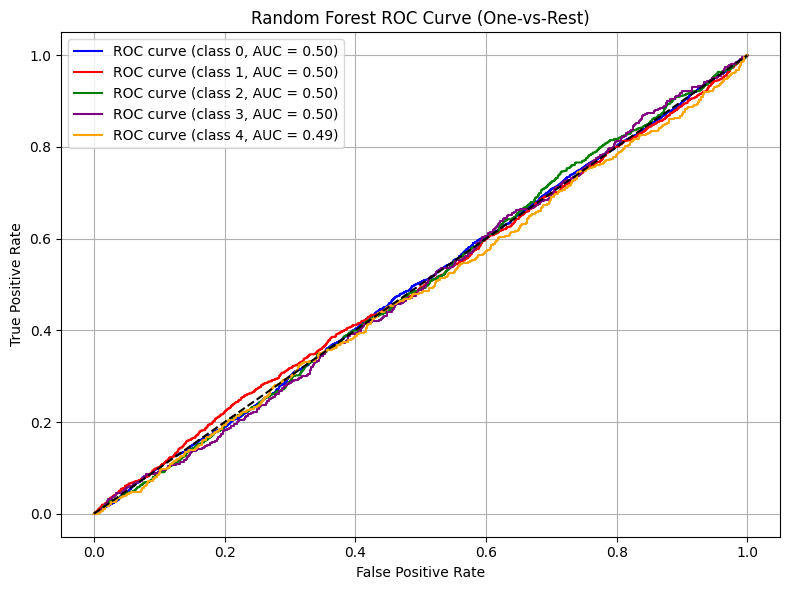

In [ ]:
y_score = model.predict_proba(X_test_fs)
fpr, tpr, roc_auc = {}, {}, {}
for i in range(5):
    fpr[i], tpr[i], _ = roc_curve(y_test_fs == i, y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))
colors = cycle(['blue', 'red', 'green', 'purple', 'orange'])
for i, color in zip(range(5), colors):
    plt.plot(fpr[i], tpr[i], color=color, label=f'ROC curve (class {i}, AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('Random Forest ROC Curve (One-vs-Rest)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.savefig('random_forest_roc_curve.png', dpi=300, bbox_inches='tight')
plt.show()

**CatBoost**

In [ ]:
cb_model = CatBoostClassifier(
    iterations=500,
    depth=6,
    learning_rate=0.1,
    random_seed=42,
    auto_class_weights='Balanced',
    verbose=0
)
cb_model.fit(X_train_fs, y_train_fs)
y_pred = cb_model.predict(X_test_fs)

In [ ]:
print("CatBoost Classification Report")
print(classification_report(y_test_fs, y_pred, target_names=['No Fault', 'Minor', 'Moderate', 'Severe', 'Critical']))

CatBoost Classification Report
              precision    recall  f1-score   support

    No Fault       0.70      0.32      0.44      6106
       Minor       0.10      0.20      0.13       894
    Moderate       0.10      0.20      0.13       881
      Severe       0.05      0.13      0.08       438
    Critical       0.06      0.15      0.08       446

    accuracy                           0.28      8765
   macro avg       0.20      0.20      0.17      8765
weighted avg       0.51      0.28      0.34      8765



**Neural Network (MLP with PyTorch)**

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_fs)
X_test_scaled = scaler.transform(X_test_fs)

In [ ]:
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_fs.values, dtype=torch.long)
y_test_tensor = torch.tensor(y_test_fs.values, dtype=torch.long)

In [ ]:
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

In [ ]:
class MLP(nn.Module):
    def __init__(self, input_dim, hidden_dim=64, output_dim=5):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.3)
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        self.fc3 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [ ]:
nn_model = MLP(input_dim=X_train_fs.shape[1])
criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float32))
optimizer = optim.Adam(nn_model.parameters(), lr=0.001)

In [ ]:
nn_model.train()
for epoch in range(50):
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = nn_model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()

In [ ]:
nn_model.eval()
with torch.no_grad():
    outputs = nn_model(X_test_tensor)
    _, y_pred = torch.max(outputs, 1)
    y_score = torch.softmax(outputs, dim=1).numpy()

In [ ]:
print("MLP Classification Report:")
print(classification_report(y_test_tensor, y_pred.numpy(), target_names=['No Fault', 'Minor', 'Moderate', 'Severe', 'Critical']))

MLP Classification Report:
              precision    recall  f1-score   support

    No Fault       0.71      0.09      0.16      6106
       Minor       0.10      0.21      0.13       894
    Moderate       0.10      0.20      0.13       881
      Severe       0.05      0.30      0.08       438
    Critical       0.05      0.20      0.08       446

    accuracy                           0.13      8765
   macro avg       0.20      0.20      0.12      8765
weighted avg       0.52      0.13      0.14      8765



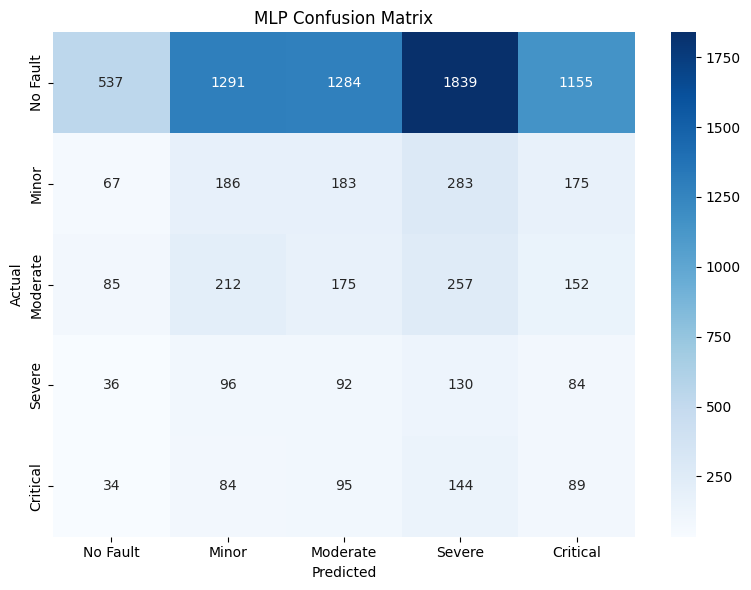

In [ ]:
cm = confusion_matrix(y_test_tensor, y_pred.numpy())
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Fault', 'Minor', 'Moderate', 'Severe', 'Critical'],
            yticklabels=['No Fault', 'Minor', 'Moderate', 'Severe', 'Critical'])
plt.title('MLP Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.savefig('mlp_confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

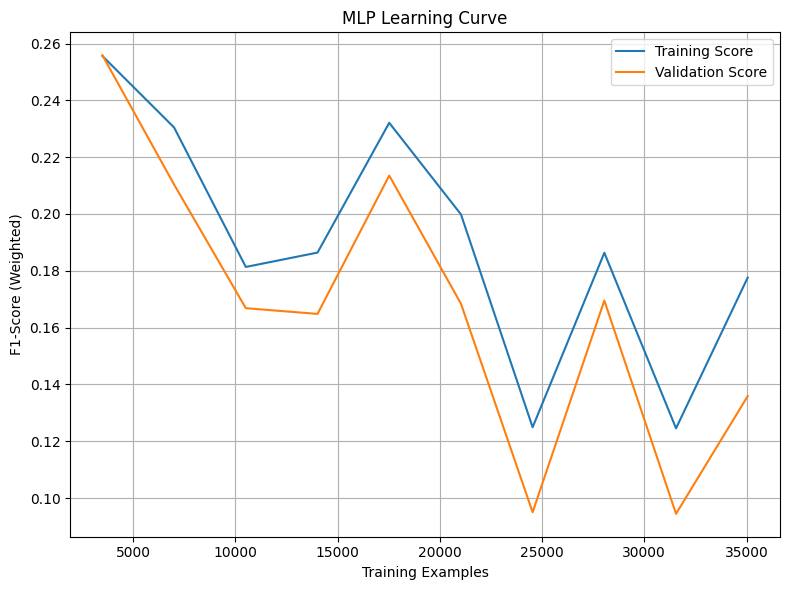

In [ ]:
train_sizes = np.linspace(0.1, 1.0, 10)
train_scores, val_scores = [], []
for size in train_sizes:
    train_subset = TensorDataset(X_train_tensor[:int(size * len(X_train_tensor))],
                                y_train_tensor[:int(size * len(y_train_tensor))])
    subset_loader = DataLoader(train_subset, batch_size=64, shuffle=True)
    model = MLP(input_dim=X_train.shape[1])
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    model.train()
    for epoch in range(20):  # Reduced epochs for speed
        for X_batch, y_batch in subset_loader:
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()

    model.eval()
    with torch.no_grad():
        train_outputs = model(X_train_tensor)
        train_pred = torch.max(train_outputs, 1)[1]
        train_f1 = f1_score(y_train, train_pred.numpy(), average='weighted')
        val_outputs = model(X_test_tensor)
        val_pred = torch.max(val_outputs, 1)[1]
        val_f1 = f1_score(y_test, val_pred.numpy(), average='weighted')
    train_scores.append(train_f1)
    val_scores.append(val_f1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes * len(X_train), train_scores, label='Training Score')
plt.plot(train_sizes * len(X_train), val_scores, label='Validation Score')
plt.title('MLP Learning Curve')
plt.xlabel('Training Examples')
plt.ylabel('F1-Score (Weighted)')
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.savefig('mlp_learning_curve.png', dpi=300, bbox_inches='tight')
plt.show()

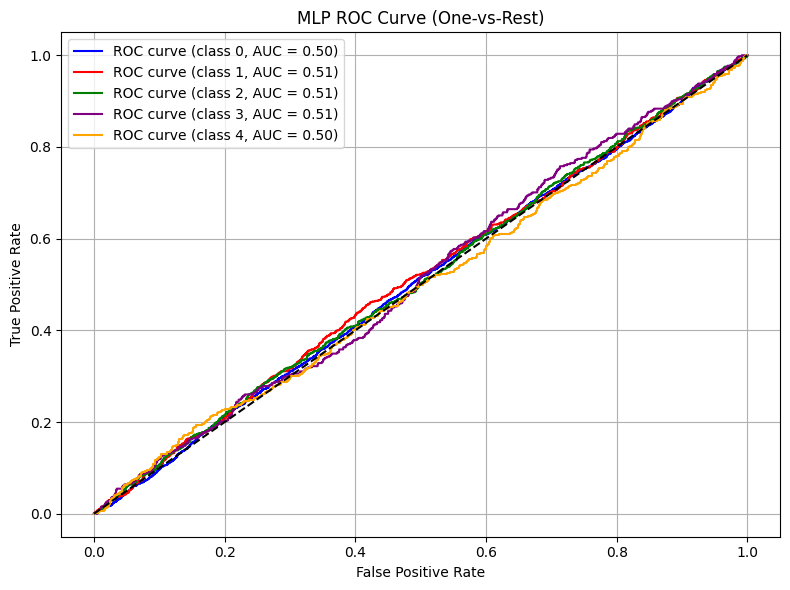

In [ ]:
fpr, tpr, roc_auc = {}, {}, {}
for i in range(5):
    fpr[i], tpr[i], _ = roc_curve(y_test_tensor == i, y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))
colors = cycle(['blue', 'red', 'green', 'purple', 'orange'])
for i, color in zip(range(5), colors):
    plt.plot(fpr[i], tpr[i], color=color, label=f'ROC curve (class {i}, AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('MLP ROC Curve (One-vs-Rest)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.savefig('mlp_roc_curve.png', dpi=300, bbox_inches='tight')
plt.show()

## Dataset Balance (Using SMOTE)

---



In [60]:
from imblearn.over_sampling import SMOTE

In [64]:
smote = SMOTE(random_state=42)
X_train_fs_smote, y_train_fs_smote = smote.fit_resample(X_train_fs, y_train_fs)

In [66]:
print("Before SMOTE:", y_train_fs.value_counts())
print("After SMOTE:", pd.Series(y_train_fs_smote).value_counts())

Before SMOTE: Fault_Diagnosis
0.0    9840
2.0    1435
1.0    1410
4.0     708
3.0     693
Name: count, dtype: int64
After SMOTE: Fault_Diagnosis
4.0    9840
1.0    9840
0.0    9840
2.0    9840
3.0    9840
Name: count, dtype: int64


## Model Evaluation after Balance

---



**XGBoost**

In [103]:
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.model_selection import StratifiedKFold, cross_val_score

In [68]:
sample_weights = compute_sample_weight(class_weight='balanced', y=y_train_fs_smote)


In [ ]:
xgb_model = XGBClassifier(
    objective='multi:softmax',
    num_class=5,
    eval_metric='mlogloss',
    random_state=42
)
xgb_model.fit(X_train_fs_smote, y_train_fs_smote, sample_weight=sample_weights)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_class=5, num_parallel_tree=None, ...)

In [ ]:
y_pred = xgb_model.predict(X_test_fs)
y_score = xgb_model.predict_proba(X_test_fs)

In [ ]:
print("XGBoost Classification Report:")
print(classification_report(y_test_fs, y_pred, target_names=['No Fault', 'Minor', 'Moderate', 'Severe', 'Critical']))

XGBoost Classification Report:
              precision    recall  f1-score   support

    No Fault       0.69      0.60      0.64      6106
       Minor       0.09      0.10      0.09       894
    Moderate       0.10      0.11      0.10       881
      Severe       0.07      0.11      0.08       438
    Critical       0.05      0.08      0.06       446

    accuracy                           0.45      8765
   macro avg       0.20      0.20      0.20      8765
weighted avg       0.51      0.45      0.47      8765



**Hyperparameter Tuning**

In [70]:
!pip install scikit-optimize

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 4.6 MB/s eta 0:00:00


In [71]:
from sklearn.model_selection import StratifiedKFold
from skopt import BayesSearchCV
from skopt.space import Real, Integer
from sklearn.metrics import make_scorer, f1_score
from collections import Counter

In [72]:
class_counts = Counter(y_train_fs_smote)
total = sum(class_counts.values())
num_classes = len(class_counts)
class_weights = {cls: total / (num_classes * count) for cls, count in class_counts.items()}

In [73]:
sample_weights = np.array([class_weights[y] for y in y_train_fs_smote])

In [ ]:
param_space = {
    'n_estimators': Integer(100, 1000),
    'max_depth': Integer(3, 15),
    'learning_rate': Real(0.01, 0.3, prior='log-uniform'),
    'subsample': Real(0.5, 1.0),
    'colsample_bytree': Real(0.5, 1.0),
    'gamma': Real(0, 5),
    'reg_alpha': Real(0, 5),
    'reg_lambda': Real(0, 5)
}

In [ ]:
xgb_model = XGBClassifier(
    objective='multi:softprob',
    num_class=5,
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42
)

In [ ]:
opt = BayesSearchCV(
    estimator=xgb_model,
    search_spaces=param_space,
    n_iter=30,  # Increase for more thorough search
    scoring=make_scorer(f1_score, average='weighted'),
    cv=StratifiedKFold(n_splits=3, shuffle=True, random_state=42),
    verbose=2,
    n_jobs=-1,
    random_state=42
)

In [ ]:
opt.fit(X_train_fs_smote, y_train_fs_smote, sample_weight=sample_weights)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fi

/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:34:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


BayesSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
              estimator=XGBClassifier(base_score=None, booster=None,
                                      callbacks=None, colsample_bylevel=None,
                                      colsample_bynode=None,
                                      colsample_bytree=None, device=None,
                                      early_stopping_rounds=None,
                                      enable_categorical=False,
                                      eval_metric='mlogloss',
                                      feature_types=None, gamma=None,
                                      grow_policy=None, importa...
                             'max_depth': Integer(low=3, high=15, prior='uniform', transform='normalize'),
                             'n_estimators': Integer(low=100, high=1000, prior='uniform', transform='normalize'),
                             'reg_alpha': Real(low=0, high=5, prior='uniform', transform='normalize'),
                             'reg_lambda': Real(low=0, high=5, prior='uniform', transform='normalize'),
                             'subsample': Real(low=0.5, high=1.0, prior='uniform', transform='normalize')},
              verbose=2)

In [ ]:
print("Best Parameters:", opt.best_params_)
print("Best Weighted F1-Score:", opt.best_score_)

Best Parameters: OrderedDict([('colsample_bytree', 1.0), ('gamma', 0.0), ('learning_rate', 0.15277462483725765), ('max_depth', 14), ('n_estimators', 1000), ('reg_alpha', 0.0), ('reg_lambda', 5.0), ('subsample', 1.0)])
Best Weighted F1-Score: 0.9384463445489466


**Retrain XGBoost with Hyperparameter Tuning**

In [ ]:
best_xgb = opt.best_estimator_

In [ ]:
y_pred = best_xgb.predict(X_test_fs)

In [ ]:
print("Classification Report:")
print(classification_report(y_test_fs, y_pred, target_names=['No Fault', 'Minor', 'Moderate', 'Severe', 'Critical']))

Classification Report:
              precision    recall  f1-score   support

    No Fault       0.70      0.90      0.79      6106
       Minor       0.09      0.03      0.05       894
    Moderate       0.09      0.03      0.05       881
      Severe       0.06      0.02      0.03       438
    Critical       0.07      0.02      0.03       446

    accuracy                           0.64      8765
   macro avg       0.20      0.20      0.19      8765
weighted avg       0.51      0.64      0.56      8765



**Using SMOTETomek**

In [74]:
from imblearn.combine import SMOTETomek
from collections import Counter
from sklearn.metrics import f1_score, accuracy_score, make_scorer

In [ ]:
smt = SMOTETomek(random_state=42)
X_train_resampled, y_train_resampled = smt.fit_resample(X_train_fs, y_train_fs)

In [ ]:
print("Before Resampling:", Counter(y_train_fs))
print("After Resampling :", Counter(y_train_resampled))

Before Resampling: Counter({0: 24424, 1: 3575, 2: 3525, 4: 1783, 3: 1751})
After Resampling : Counter({2: 24424, 3: 24424, 4: 24424, 0: 24423, 1: 24423})


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test_fs)

In [ ]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(
    colsample_bytree=1.0,
    gamma=0.0,
    learning_rate=0.15277,
    max_depth=14,
    n_estimators=1000,
    reg_alpha=0.0,
    reg_lambda=5.0,
    subsample=1.0,
    objective='multi:softprob',
    num_class=5,
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42
)

xgb_model.fit(X_train_scaled, y_train_resampled)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:27:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=0.0, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.15277, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=14,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=1000,
              n_jobs=None, num_class=5, num_parallel_tree=None, ...)

In [ ]:
y_pred = xgb_model.predict(X_test_scaled)

In [ ]:
print("XGBoost Classification Report (SMOTETomek):")
print(classification_report(y_test_fs, y_pred, target_names=['No Fault', 'Minor', 'Moderate', 'Severe', 'Critical']))

XGBoost Classification Report (SMOTETomek):
              precision    recall  f1-score   support

    No Fault       0.70      0.90      0.79      6106
       Minor       0.08      0.03      0.04       894
    Moderate       0.09      0.03      0.05       881
      Severe       0.07      0.02      0.03       438
    Critical       0.04      0.01      0.02       446

    accuracy                           0.64      8765
   macro avg       0.20      0.20      0.18      8765
weighted avg       0.51      0.64      0.56      8765



In [ ]:
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

In [ ]:
best_params = {
    'colsample_bytree': 1.0,
    'gamma': 0.0,
    'learning_rate': 0.15277462483725765,
    'max_depth': 14,
    'n_estimators': 1000,
    'reg_alpha': 0.0,
    'reg_lambda': 5.0,
    'subsample': 1.0,
    'random_state': 42
}

In [ ]:
xgb_model = XGBClassifier(**best_params)
xgb_model.fit(X_train_resampled, y_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.15277462483725765,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=14, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
f1_scorer = make_scorer(f1_score, average='weighted')
cv_f1_scores = cross_val_score(xgb_model, X_train_resampled, y_train_resampled, cv=cv, scoring=f1_scorer)
print(f"CV Weighted F1-scores: {cv_f1_scores}")
print(f"Mean CV F1-score: {cv_f1_scores.mean():.3f} ± {cv_f1_scores.std():.3f}")

CV Weighted F1-scores: [0.95275726 0.95153948 0.95236589 0.94931328 0.95060193]
Mean CV F1-score: 0.951 ± 0.001


In [ ]:
y_pred = xgb_model.predict(X_test_fs)
test_f1 = f1_score(y_test_fs, y_pred, average='weighted')
test_acc = accuracy_score(y_test, y_pred)
print(f"Test Weighted F1-score: {test_f1:.3f}")
print(f"Test Accuracy: {test_acc:.3f}")

Test Weighted F1-score: 0.557
Test Accuracy: 0.633


**LightGBM**

In [ ]:
lgbm_model = LGBMClassifier(
    num_leaves=31,
    max_depth=8,
    learning_rate=0.1,
    n_estimators=200,
    min_child_samples=20,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=1.0,
    reg_lambda=1.0,
    random_state=42,
    n_jobs=-1
)

In [ ]:
lgbm_model.fit(X_train_fs_smote, y_train_fs_smote)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.090245 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 65710, number of used features: 30
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438


LGBMClassifier(colsample_bytree=0.8, max_depth=8, n_estimators=200, n_jobs=-1,
               random_state=42, reg_alpha=1.0, reg_lambda=1.0, subsample=0.8)

In [ ]:
y_pred = lgbm_model.predict(X_test_fs)

In [ ]:
print("LightGBM Classification Report")
print(classification_report(y_test_fs, y_pred, target_names=['No Fault', 'Minor', 'Moderate', 'Severe', 'Critical']))

LightGBM Classification Report
              precision    recall  f1-score   support

    No Fault       0.70      0.66      0.68      3286
       Minor       0.10      0.10      0.10       471
    Moderate       0.11      0.11      0.11       472
      Severe       0.06      0.09      0.07       229
    Critical       0.06      0.08      0.07       238

    accuracy                           0.49      4696
   macro avg       0.21      0.21      0.21      4696
weighted avg       0.52      0.49      0.50      4696



**Hyperparameter Tuning**

In [ ]:
param_space = {
    'num_leaves': Integer(20, 50),
    'max_depth': Integer(4, 10),
    'learning_rate': Real(0.01, 0.3, prior='log-uniform'),
    'n_estimators': Integer(100, 1000),
    'min_child_samples': Integer(10, 50),
    'subsample': Real(0.6, 1.0),
    'colsample_bytree': Real(0.6, 1.0),
    'reg_alpha': Real(0.0, 10.0),
    'reg_lambda': Real(0.0, 10.0)
}

In [ ]:
f1_scorer = make_scorer(f1_score, average='weighted')
bayes_search = BayesSearchCV(
    estimator=lgbm_model,
    search_spaces=param_space,
    n_iter=50,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    scoring=f1_scorer,
    n_jobs=-1,
    verbose=1,
    random_state=42
)

In [ ]:
bayes_search.fit(X_train_fs_smote, y_train_fs_smote)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

In [ ]:
print("Best Parameters:", bayes_search.best_params_)
print("Best Weighted F1-Score:", bayes_search.best_score_)

NameError: name 'bayes_search' is not defined

In [ ]:
best_lgbm = LGBMClassifier(**bayes_search.best_params_, random_state=42, n_jobs=-1)
best_lgbm.fit(X_train_fs_smote, y_train_fs_smote)

In [ ]:
y_pred = best_lgbm.predict(X_test_fs)

In [ ]:
print("LightGBM Classification Report")
print(classification_report(y_test_fs, y_pred, target_names=['No Fault', 'Minor', 'Moderate', 'Severe', 'Critical']))

**Random Forest**

In [75]:
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=8,
    min_samples_split=10,
    min_samples_leaf=5,
    max_features='sqrt',
    random_state=42,
    n_jobs=-1
)

In [76]:
rf_model.fit(X_train_fs_smote, y_train_fs_smote)

RandomForestClassifier(max_depth=8, min_samples_leaf=5, min_samples_split=10,
                       n_estimators=200, n_jobs=-1, random_state=42)

In [77]:
y_pred = rf_model.predict(X_test_fs)

In [78]:
print("Random Forest Classification Report")
print(classification_report(y_test_fs, y_pred, target_names=['No Fault', 'Minor', 'Moderate', 'Severe', 'Critical']))

Random Forest Classification Report
              precision    recall  f1-score   support

    No Fault       0.70      0.52      0.60      2461
       Minor       0.08      0.05      0.06       352
    Moderate       0.11      0.06      0.07       359
      Severe       0.05      0.18      0.08       173
    Critical       0.05      0.18      0.07       177

    accuracy                           0.39      3522
   macro avg       0.20      0.20      0.18      3522
weighted avg       0.51      0.39      0.44      3522



Cross Validation

In [109]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
f1_scorer = make_scorer(f1_score, average='weighted')
cv_f1_scores = cross_val_score(rf_model, X_train_fs_smote, y_train_fs_smote, cv=cv, scoring=f1_scorer)
print(f"CV Weighted F1-scores: {cv_f1_scores}")
print(f"Mean CV F1-score: {cv_f1_scores.mean():.3f} ± {cv_f1_scores.std():.3f}")

CV Weighted F1-scores: [0.43398052 0.42851965 0.43167564 0.43112315 0.42314082]
Mean CV F1-score: 0.430 ± 0.004


**CatBoost**

In [82]:
catboost = CatBoostClassifier(
    iterations=200,
    depth=8,
    learning_rate=0.1,
    min_data_in_leaf=5,
    bootstrap_type='Bernoulli',
    subsample=0.8,
    colsample_bylevel=0.8,
    l2_leaf_reg=3.0,
    random_state=42,
    verbose=0
)

In [83]:
catboost.fit(X_train_fs_smote, y_train_fs_smote)

In [84]:
y_pred = catboost.predict(X_test_fs)

In [85]:
print("CatBoost Classification Report")
print(classification_report(y_test_fs, y_pred, target_names=['No Fault', 'Minor', 'Moderate', 'Severe', 'Critical']))

CatBoost Classification Report
              precision    recall  f1-score   support

    No Fault       0.70      0.64      0.67      2461
       Minor       0.08      0.09      0.08       352
    Moderate       0.11      0.12      0.12       359
      Severe       0.03      0.04      0.03       173
    Critical       0.06      0.10      0.08       177

    accuracy                           0.48      3522
   macro avg       0.20      0.20      0.20      3522
weighted avg       0.51      0.48      0.49      3522



Cross Validation

In [107]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
f1_scorer = make_scorer(f1_score, average='weighted')
cv_f1_scores = cross_val_score(catboost, X_train_fs_smote, y_train_fs_smote, cv=cv, scoring=f1_scorer)
print(f"CV Weighted F1-scores: {cv_f1_scores}")
print(f"Mean CV F1-score: {cv_f1_scores.mean():.3f} ± {cv_f1_scores.std():.3f}")

CV Weighted F1-scores: [0.75190418 0.76043175 0.76566606 0.76758747 0.76006593]
Mean CV F1-score: 0.761 ± 0.005


**Neural Network(MLP with Pytorch)**

In [89]:
import random

In [90]:
random.seed(42)
np.random.seed(42)
torch.manual_seed(42)

In [91]:
scaler = StandardScaler()
X_train_fs_smote = scaler.fit_transform(X_train_fs_smote)
X_test = scaler.transform(X_test_fs)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [93]:
X_train_tensor = torch.tensor(X_train_fs_smote, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_fs_smote.values, dtype=torch.long)
X_test_tensor = torch.tensor(X_test_fs.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test_fs.values, dtype=torch.long)

In [94]:
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.3)
        self.fc2 = nn.Linear(hidden_size, hidden_size // 2)
        self.fc3 = nn.Linear(hidden_size // 2, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.dropout(out)
        out = self.fc2(out)
        out = self.relu(out)
        out = self.fc3(out)
        return out

In [95]:
input_size = X_train_fs_smote.shape[1]
hidden_size = 100
num_classes = len(np.unique(y_train_fs_smote))
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [96]:
model = MLP(input_size, hidden_size, num_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=0.01)

In [97]:
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

In [98]:
model.train()
num_epochs = 50
for epoch in range(num_epochs):
    for data, labels in train_loader:
        data, labels = data.to(device), labels.to(device)
        outputs = model(data)
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

In [99]:
model.eval()
with torch.no_grad():
    X_test_tensor = X_test_tensor.to(device)
    y_pred = model(X_test_tensor).argmax(dim=1).cpu().numpy()

In [100]:
print("Neural Network Classification Report")
print(classification_report(y_test_tensor, y_pred, target_names=['No Fault', 'Minor', 'Moderate', 'Severe', 'Critical']))

Neural Network Classification Report
              precision    recall  f1-score   support

    No Fault       0.69      0.19      0.30      2461
       Minor       0.12      0.09      0.10       352
    Moderate       0.12      0.04      0.06       359
      Severe       0.04      0.28      0.07       173
    Critical       0.05      0.39      0.10       177

    accuracy                           0.18      3522
   macro avg       0.21      0.20      0.13      3522
weighted avg       0.51      0.18      0.23      3522



Cross Validation

In [105]:
class MLPWrapper:
    def __init__(self, input_size, hidden_size, num_classes, num_epochs=50, lr=0.001, weight_decay=0.01, batch_size=32):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.num_classes = num_classes
        self.num_epochs = num_epochs
        self.lr = lr
        self.weight_decay = weight_decay
        self.batch_size = batch_size
        self.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

    def fit(self, X, y):
        X_tensor = torch.tensor(X, dtype=torch.float32)
        y_tensor = torch.tensor(y, dtype=torch.long)
        dataset = TensorDataset(X_tensor, y_tensor)
        loader = DataLoader(dataset, batch_size=self.batch_size, shuffle=True)
        self.model = MLP(self.input_size, self.hidden_size, self.num_classes).to(self.device)
        criterion = nn.CrossEntropyLoss()
        optimizer = optim.Adam(self.model.parameters(), lr=self.lr, weight_decay=self.weight_decay)
        self.model.train()
        for _ in range(self.num_epochs):
            for data, labels in loader:
                data, labels = data.to(self.device), labels.to(self.device)
                outputs = self.model(data)
                loss = criterion(outputs, labels)
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()
        return self

    def predict(self, X):
        self.model.eval()
        with torch.no_grad():
            X_tensor = torch.tensor(X, dtype=torch.float32).to(self.device)
            return self.model(X_tensor).argmax(dim=1).cpu().numpy()

    def get_params(self, deep=True):
        return {
            'input_size': self.input_size,
            'hidden_size': self.hidden_size,
            'num_classes': self.num_classes,
            'num_epochs': self.num_epochs,
            'lr': self.lr,
            'weight_decay': self.weight_decay,
            'batch_size': self.batch_size
        }

    def set_params(self, **params):
        for key, value in params.items():
            setattr(self, key, value)
        return self

In [106]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
f1_scorer = make_scorer(f1_score, average='weighted')
mlp_wrapper = MLPWrapper(input_size, hidden_size, num_classes)
cv_f1_scores = cross_val_score(mlp_wrapper, X_train_fs_smote, y_train_fs_smote, cv=cv, scoring=f1_scorer)
print(f"CV Weighted F1-scores: {cv_f1_scores}")
print(f"Mean CV F1-score: {cv_f1_scores.mean():.3f} ± {cv_f1_scores.std():.3f}")

CV Weighted F1-scores: [0.34723039 0.33045935 0.30856491        nan 0.32901174]
Mean CV F1-score: nan ± nan


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
1 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "<ipython-input-105-a3f4eb97d1ee>", line 14, in fit
    y_tensor = torch.tensor(y, dtype=torch.long)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: could not determine the shape of object type 'Series'

  warnings.warn(some_fits_failed_message, FitFailedWarning)
